# 📘 Proyecto de Aula - Fundamentos en Ciencia de Datos

*"Análisis exploratorio y procesamiento de data para el Diseño de una cadena de abastecimiento para la reducción del desperdicio de alimentos cárnicos en Colombia, considerando el marco normativo"*

# **1. Introducción**

**Pregunta de investigación**
¿Cuál debería ser el diseño de una cadena de abastecimiento que contribuya a la disminución de desperdicios de alimentos perecederos a través de donaciones que tenga en consideración los requerimientos e incentivos operativos y normativos en Colombia?


La problemática de las pérdidas y desperdicios de alimentos (PDA) es crítica a nivel global y nacional, con impactos económicos, sociales y ambientales significativos. En Colombia, se desperdician grandes cantidades de alimentos mientras más de la mitad de la población enfrenta inseguridad alimentaria, generando además emisiones contaminantes y pérdidas económicas del 1,3% del PIB. Las causas son múltiples: desde ineficiencias en la producción, distribución y consumo, hasta vacíos normativos y logísticos. Aunque el país ha avanzado en legislación (Ley 1990 de 2019 y Ley 2380 de 2024), los incentivos fiscales no se corresponden con la limitada capacidad logística, que solo permite recuperar el 12% del potencial alimentario disponible. Esto evidencia la urgencia de transformar la cadena de recuperación alimentaria mediante modelos logísticos más eficientes, coordinados y adaptados al nuevo marco legal.

El problema de investigación gira en torno a una empresa del sector alimentos carnicos, en dónde tiene una excelente trazabilidad en cuanto al desperdicio de alimentos en una lìnea que es las "devoluciones", sin embargo, las "donaciones" son un tema de interés y la data proporciona registros del 2022, 2023 y 2024.

# **2. Importar librerías necesarias**

In [44]:
# Librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Instalar librerías necesarias
!pip install pingouin seaborn
!pip install pandas numpy seaborn matplotlib scikit-learn openpyxl --quiet

# Importar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
from scipy import stats
from scipy.stats import skew, kurtosis

from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# **3. Carga de datos**

In [ ]:
# Datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_txt = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/donaciones.txt"

# Crear DataSet
df = pd.read_csv(ruta_txt, sep=';', encoding='latin-1')

In [ ]:
# Visualizar una pequeña muestra de los datos
df.head()

,Semana,Mes Calendario,FechaFact#,Material,Denominación,Cantidad,UMB,C# Motivo ped,C# Centro,Valor,...,Peso Kg,Desguace KG,Planta,Red,Negocio,año,Oficina de ventas,Descripcion de la oficina,Ord/Ext,Causales
0,2022.43,octubre,2022-10-28 00:00:00.000,1042123,N/A Salch. Pavo PIETRAN 350g 7 UN,16,UN,D19,NN18,129904,...,0.349999994039536,559.999.990.463.257,Caloto,Red Comercial,Negocio Cárnico,2022,NaN,R Bogotá,D. Ordinaria,Baja Rotación
1,2022.16,abril,2022-04-18 00:00:00.000,1020417,Hamburg. Preasada ZENU x 400 g,23,UN,D19,NN14,194074,...,0.400000005960464,919.999.980.926.514,Bogotá,Red Comercial,Negocio Cárnico,2022,20.0,R Barranquilla,D. Ordinaria,Baja Rotación
2,2022.16,abril,2022-04-18 00:00:00.000,1009665,Salch. Tipo Alemana ZENU x 360 g,6,UN,D19,NN14,44364,...,0.360000014305115,216.000.008.583.069,Amarre,Red Comercial,Negocio Cárnico,2022,20.0,R Barranquilla,D. Ordinaria,Baja Rotación
3,2022.16,abril,2022-04-18 00:00:00.000,1045789,N/ASalch. Cazadora CUNIT x 250g,25,UN,D19,NN14,80425,...,0.25,6.25,Bogotá,Red Comercial,Negocio Cárnico,2022,20.0,R Barranquilla,D. Ordinaria,Baja Rotación
4,2022.16,abril,2022-04-18 00:00:00.000,1025354,N/A Cbo.2Cbno.RANCHERA 200g Pleg.8 Und.,3,UN,D19,NN14,27288,...,0.800000011920929,240.000.009.536.743,Bogotá,Red Comercial,Negocio Cárnico,2022,20.0,R Barranquilla,D. Extraordinaria,Baja Rotación


In [ ]:
#PASO PARA ANALIZAR TODOS LOS CAMPOS DEL DF
# Obtener estadísticas descriptivas
desc = df.describe(include="all")

# Ruta donde guardar el archivo en Google Drive
ruta_excel = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/resumen_descriptivo.xlsx"

# Exportar a Excel
desc.to_excel(ruta_excel, sheet_name="Describe")

print(f"Archivo exportado en: {ruta_excel}")

Archivo exportado en: /content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/resumen_descriptivo.xlsx


# **4. Descripción de la base de datos**

In [ ]:
# Visualizar una pequeña muestra de los datos
df.head()

,Concatenado,Semana,Mes Calendario,Factura,FechaFact#,Material,DenominaciÃ³n,Cantidad,UMB,C# Motivo ped,...,Prod-UbicaciÃ³n,Planta,Red,Negocio,aÃ±o,Oficina de ventas,Descripcion de la oficina,Ord/Ext,Causales,Causales NUEVOS
0,1001069NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1001069,Salch. Viena RICA x 150 g,3.0,UN,D19,...,1001069NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
1,1011774NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1011774,Salch. Frankfurt ZENU 360g,1.0,UN,D19,...,1011774NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
2,1035355NNB1,2022.52,diciembre,INN534823,2022-12-26 00:00:00.000,1035355,2 Jmn. PIETRAN Estd. x 100 g SIN C,2.0,UN,D19,...,1035355NNB1,MedellÃ­n,Red Comercial,Negocio CÃ¡rnico,2022,NaN,R Cali,D. Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
3,1035355NNB1,2022.52,diciembre,INN534830,2022-12-26 00:00:00.000,1035355,2 Jmn. PIETRAN Estd. x 100 g SIN C,1.0,UN,D19,...,1035355NNB1,MedellÃ­n,Red Comercial,Negocio CÃ¡rnico,2022,NaN,R Cali,D. Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n
4,1000145NN47,2023.12,marzo,INN558727,2023-03-25 00:00:00.000,1000145,Cne. Diablo ZENU x 80 g,1.0,UN,D19,...,1000145NN47,MedellÃ­n,Red Comercial,Comercial Nutresa,2023,10,R BogotÃ¡,LV Ordinaria,Baja RotaciÃ³n,Baja RotaciÃ³n


In [ ]:
# Número de registros y variables
print(f"Número de registros: {df.shape[0]}")
print(f"Número de variables: {df.shape[1]}")

Número de registros: 52726
Número de variables: 42


In [ ]:
# Tipos de datos
print("\nTipos de datos por variable:")
print(df.dtypes.value_counts())


Tipos de datos por variable:
object     32
float64     5
int64       5
Name: count, dtype: int64


**SELECCIÓN DE VARIABLES DE INTERÉS**

En vista de que es una base de datos muy grande y en realidad para el estudio no es necesario utilizar todas las variables, se realizan dos filtros para seleccionar las variables de interés. En primer lugar se depurar las variables sin objetivo propio, variables redundantes, etc. Que se presentan a continuación:

| 🧩 **Variable** | 📐 **Motivo eliminación** |
|------------------|-------------|
|  **1 Concatenado**  | Es un campo de código de concatenación entre otras coolumnas |
|  **2 Semana**     | Se puede obtener del campo fecha |
|  **3 Mes Calendario**      | Se puede obtener del campo fecha |
|  **4 Factura**  |  No aporta información relevante al análisis |
|  **5 Denominación**  | Es la descripción del material |
|  **6 UMB**    | La Unidad de Medida Base, es una variable que no aporta infromación al análisis. |
|  **7 Doc#vtas#**    | No aporta información relevante al análisis |
|  **8 Rsp Pa**    | No aporta información relevante al análisis |
|  **9 Clase de Doc Ventas**    | No aporta información relevante al análisis |
|  **10 C# Costos**    | El centro de costos es un dato relevante para análisis financieros |
|  **11 Texto**    | Son textos de reporte que no tienen una línea de información estricta |
|  **12 Centro**    | Son los nombres del código del centro de costos |
|  **13 Tipo de Desguace**    | Se elimina, porque todo es donación |
|  **14 Motivo de desguace**    | Se elimina, porque es igual al campo "CAUSAL" |
|  **15 Prod-Ubicación**    | Es una combinación entredos campos |
|  **16 Año**    | El campo se puede extraer del campo "fechafact" |
|  **17 Oficina de ventas**    | Campo duplicado "oficina de ventas" |
|  **18 Descripcion de la oficina**    | Es la descripción de la oficina de ventas |
|  **19 Causales**    | Está incompleto, la variable completa es CAUSALES NUEVAS |
|  **20 Motivo de pedido**    | Es la descripción del C#motivopedido |


En una segunda fase, para elegir las variables por medio de una búsqueda de literatura, Akkaş y Gaur (2022) analiza el problema del desperdicio de alimentos y propone una agenda de investigación dentro del campo de la gestión de operaciones (OM) para contribuir a su reducción. Aunque el interés en este tema ha aumentado notablemente desde 2010, el enfoque desde la OM sigue siendo limitado en comparación con otras disciplinas. El estudio clasifica el desperdicio según su tipo, causas, etapas de la cadena de valor y cuestiones relacionadas con su cuantificación, reducción y recuperación.

La agenda de investigación se organiza en cinco áreas clave: tecnología, logística, incentivos y coordinación, innovación en modelos de negocio y operaciones conductuales. Además, Akkaş y Gaur (2022) resalta el potencial educativo del tema en cursos de OM y las oportunidades que ofrecen las tecnologías digitales y las plataformas de recuperación de alimentos. En conclusión, hace un llamado a la comunidad académica para fortalecer la investigación interdisciplinaria y desarrollar soluciones innovadoras frente a este desafío global.

Así que, como bien lo menciona Akkaş y Gaur (2022) es un tema actual y no hay estudios que analicen este tema desde la Invetsigación de operaciones, por lo tanto no hay una guía para especificar qué variables serían de interés. Es por esto que apuntando al avance que existe en el proyecto, se ilustra en la Figura 1, el modelo que se quiere estudiar y a partir de esta figura y las reuniones con expertos en el sector, se eligen las siguinetes variables a estudiar:

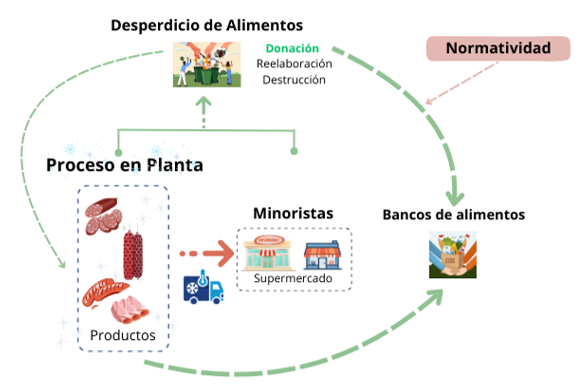




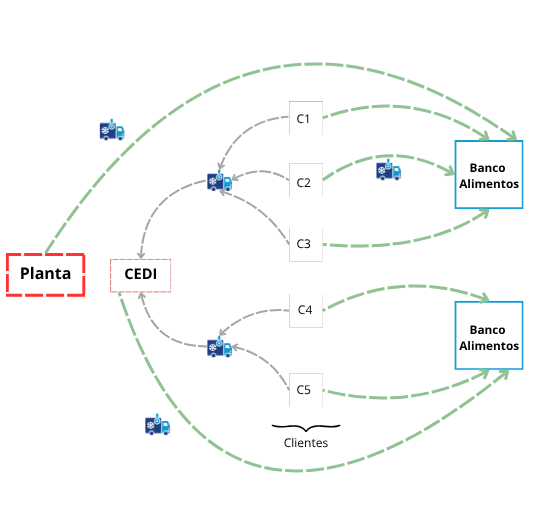


Figura 1. Elaboración Propia

**Descripción Variables del Dataset Donaciones**

La fuente de todos los datos es de una data oficial proporcionada por la compañía. [Documento ](https://docs.google.com/spreadsheets/d/16SQxba2H8U0lxludiHO7PpxPHJKbWCF6/edit?usp=sharing&ouid=104953301056408980999&rtpof=true&sd=true) de todo el proceso de depuración.

| 🧩 Variable      | 📐 Tipo        | 📝 Descripción                                                                 |
|------------------|---------------|---------------------------------------------------------------------------------|
| cantidad   | Continuo | Número de unidades donadas     |
| valor      | Continuo | Precio de la donación     |
| peso_kg    | Continuo  | Peso de cada donación en Kg  |
| donacion_kg  | Continuo  | Donación en Kg                                                  |
| material    | Categórica/Código    | Código de producto que se donó       |
| motivo  | Categórica/Código      | Razón por la cuál se donó (D19: Devolución)
| FechaFact#   | Date   | Fecha en la que se hizo la donación |
| planta   | Categórica/Código        | Planta en dónde se donó NN21: Medellín      |
| centro    | Categórica/Código  | CEDI en dónde se donó NN21: Medellín  |
| Ofc#Ventas  | Categórica/Código   | Oficina en dónde se donó NN21: Medellín  |
| Categoria  | Categórica/Código   | Tipo de material (alimentos larga vida, carnes frescas, etc.)  |
| Subcategoría  | Categórica/Código   | Tipo de material (larga vida carnicos, tajados, etc)  |
| Linea  | Categórica/Código   | Linea de producción de los materiales donados |
| Marca  | Categórica/Código   | Marca de los materiales donados |
| Ord/Ext  | Categórica/Código   | Tipo de dmanda de los materiales |
| Causales NUEVOS  | Categórica/Código   | Causal de donación |

# **5. Limpieza de los datos**

In [ ]:
# Seleccionar columnas específicas y renombrarlas
nuevo_df = df[["FechaFact#", "Material", "Cantidad", "C# Motivo ped", "Valor", "Peso Kg", "Desguace KG", "Planta", "C# Centro", "Ofc# Ventas", "CategorÃ­a ", "SubcategorÃ­a",
               "Linea", "Marca", "Ord/Ext", "Causales NUEVOS"
]].rename(
    columns={
        "FechaFact#": "fecha",
        "Material": "material",
        "Cantidad": "cantidad",
        "C# Motivo ped": "motivo",
        "Valor": "valor",
        "Peso Kg": "peso_kg",
        "Desguace KG": "donacion_kg",
        "Planta": "planta",
        "C# Centro": "centro",
        "Ofc# Ventas": "of_ventas",
        "CategorÃ­a ": "categoria",
        "SubcategorÃ­a": "subcategoria",
        "Linea": "linea",
        "Marca": "marca",
        "Ord/Ext": "demanda",
        "Causales NUEVOS": "causales"
    }
)

# Verifica el resultado
nuevo_df.head()


,fecha,material,cantidad,motivo,valor,peso_kg,donacion_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales
0,2023-03-25 00:00:00.000,1001069,3.0,D19,5232,0.15,0.45,MedellÃ­n,NN47,10,Alimentos larga vida,Larga vida CÃ¡rnicos,Salchichas Larga vida,Rica,LV Ordinaria,Baja RotaciÃ³n
1,2023-03-25 00:00:00.000,1011774,1.0,D19,3643,0.36,0.36,MedellÃ­n,NN47,10,Alimentos larga vida,Larga vida CÃ¡rnicos,Salchichas Larga vida,ZenÃº,LV Ordinaria,Baja RotaciÃ³n
2,2022-12-26 00:00:00.000,1035355,2.0,D19,8762,0.20,0.40,MedellÃ­n,NNB1,NaN,Carnes frÃ­as,Tajados,JamÃ³n,PietrÃ¡n,D. Ordinaria,Baja RotaciÃ³n
3,2022-12-26 00:00:00.000,1035355,1.0,D19,4381,0.20,0.20,MedellÃ­n,NNB1,NaN,Carnes frÃ­as,Tajados,JamÃ³n,PietrÃ¡n,D. Ordinaria,Baja RotaciÃ³n
4,2023-03-25 00:00:00.000,1000145,1.0,D19,2854,0.08,0.08,MedellÃ­n,NN47,10,Alimentos larga vida,Larga vida CÃ¡rnicos,Otros Larga vida CÃ¡rnicos,ZenÃº,LV Ordinaria,Baja RotaciÃ³n


In [ ]:
# 1️⃣ Convertir todas las columnas a texto y corregir caracteres mal codificados
nuevo_df = nuevo_df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# 2️⃣ Convertir todo el texto a minúsculas
nuevo_df = nuevo_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# Verifica el resultado
nuevo_df.head()


/tmp/ipython-input-1729272876.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nuevo_df = nuevo_df.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
/tmp/ipython-input-1729272876.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  nuevo_df = nuevo_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,fecha,material,cantidad,motivo,valor,peso_kg,donacion_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales
0,2023-03-25 00:00:00.000,1001069,3.0,d19,5232,0.15,0.45,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,rica,lv ordinaria,baja rotación
1,2023-03-25 00:00:00.000,1011774,1.0,d19,3643,0.36,0.36,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,zenú,lv ordinaria,baja rotación
2,2022-12-26 00:00:00.000,1035355,2.0,d19,8762,0.20,0.40,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
3,2022-12-26 00:00:00.000,1035355,1.0,d19,4381,0.20,0.20,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
4,2023-03-25 00:00:00.000,1000145,1.0,d19,2854,0.08,0.08,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,otros larga vida cárnicos,zenú,lv ordinaria,baja rotación


In [ ]:
nuevo_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   fecha         52726 non-null  object 
 1   material      52726 non-null  int64  
 2   cantidad      52726 non-null  float64
 3   motivo        52726 non-null  object 
 4   valor         52726 non-null  int64  
 5   peso_kg       52726 non-null  float64
 6   donacion_kg   52726 non-null  float64
 7   planta        52726 non-null  object 
 8   centro        52726 non-null  object 
 9   of_ventas     47795 non-null  object 
 10  categoria     52725 non-null  object 
 11  subcategoria  44393 non-null  object 
 12  linea         52624 non-null  object 
 13  marca         52724 non-null  object 
 14  demanda       52726 non-null  object 
 15  causales      52726 non-null  object 
dtypes: float64(3), int64(2), object(11)
memory usage: 6.4+ MB


**Modificar el tipo de dato**

In [ ]:
# Convertir a tipo datetime y luego formatear
nuevo_df["fecha"] = pd.to_datetime(nuevo_df["fecha"], errors="coerce").dt.strftime("%Y.%m.%d")

In [ ]:
# Convertir las variables categoricas
categoricas = ["material", "motivo", "planta", "centro", "of_ventas", "categoria", "subcategoria", "linea", "marca", "demanda", "causales"]

for col in categoricas:
    nuevo_df[col] = nuevo_df[col].astype("category")

In [ ]:
# Convertir las variables enteras
enteras = ["cantidad"]
nuevo_df[enteras] = nuevo_df[enteras].astype("int64")

In [ ]:
# Convertir las variables continuas
continuas = ["valor", "peso_kg", "donacion_kg"]
nuevo_df[continuas] = nuevo_df[continuas].astype("float64").round(2)


In [ ]:
nuevo_df.info()
nuevo_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         52726 non-null  object  
 1   material      52726 non-null  category
 2   cantidad      52726 non-null  int64   
 3   motivo        52726 non-null  category
 4   valor         52726 non-null  float64 
 5   peso_kg       52726 non-null  float64 
 6   donacion_kg   52726 non-null  float64 
 7   planta        52726 non-null  category
 8   centro        52726 non-null  category
 9   of_ventas     47795 non-null  category
 10  categoria     52725 non-null  category
 11  subcategoria  44393 non-null  category
 12  linea         52624 non-null  category
 13  marca         52724 non-null  category
 14  demanda       52726 non-null  category
 15  causales      52726 non-null  category
dtypes: category(11), float64(3), int64(1), object(1)
memory usage: 2.6+ MB


,fecha,material,cantidad,motivo,valor,peso_kg,donacion_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales
0,2023.03.25,1001069,3,d19,5232.0,0.15,0.45,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,rica,lv ordinaria,baja rotación
1,2023.03.25,1011774,1,d19,3643.0,0.36,0.36,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,zenú,lv ordinaria,baja rotación
2,2022.12.26,1035355,2,d19,8762.0,0.20,0.40,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
3,2022.12.26,1035355,1,d19,4381.0,0.20,0.20,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
4,2023.03.25,1000145,1,d19,2854.0,0.08,0.08,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,otros larga vida cárnicos,zenú,lv ordinaria,baja rotación


In [ ]:
df_nuevo = nuevo_df

In [ ]:
from google.colab import files

# Guardar el archivo temporalmente
df_nuevo.to_csv("df_nuevo.csv", index=False, encoding="utf-8-sig")

# Descargarlo
files.download("df_nuevo.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **6. Anlásis exploratio (EDA)**

In [3]:
# Datos
from google.colab import drive
drive.mount('/content/drive')

# Ruta del archivo en Google Drive
ruta_txt = "/content/drive/My Drive/II SEM-MASTER/Estad. Multivariada/df_nuevo.csv"

# Crear DataSet
df_nuevo = pd.read_csv(ruta_txt, sep=',', encoding='latin-1')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 1️⃣ Convertir todas las columnas a texto y corregir caracteres mal codificados
df_nuevo = df_nuevo.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)

# 2️⃣ Convertir todo el texto a minúsculas
df_nuevo = df_nuevo.applymap(lambda x: x.lower() if isinstance(x, str) else x)

/tmp/ipython-input-1334900422.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_nuevo = df_nuevo.applymap(lambda x: x.encode('latin1').decode('utf-8') if isinstance(x, str) else x)
/tmp/ipython-input-1334900422.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_nuevo = df_nuevo.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [5]:
# Convertir las variables categoricas
categoricas = ["material", "motivo", "planta", "centro", "of_ventas", "categoria", "subcategoria", "linea", "marca", "demanda", "causales"]

for col in categoricas:
    df_nuevo[col] = df_nuevo[col].astype("category")

In [6]:
# Convertir las variables enteras
enteras = ["cantidad"]
df_nuevo[enteras] = df_nuevo[enteras].astype("int64")

In [7]:
# Convertir las variables continuas
continuas = ["valor", "peso_kg", "donacion_kg"]
df_nuevo[continuas] = df_nuevo[continuas].astype("float64").round(2)


In [8]:
df_nuevo.rename(columns={df_nuevo.columns[0]: "fecha"}, inplace=True)


In [9]:
df_nuevo.info()
df_nuevo.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52726 entries, 0 to 52725
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   fecha         52726 non-null  object  
 1   material      52726 non-null  category
 2   cantidad      52726 non-null  int64   
 3   motivo        52726 non-null  category
 4   valor         52726 non-null  float64 
 5   peso_kg       52726 non-null  float64 
 6   donacion_kg   52726 non-null  float64 
 7   planta        52726 non-null  category
 8   centro        52726 non-null  category
 9   of_ventas     47795 non-null  category
 10  categoria     52725 non-null  category
 11  subcategoria  44393 non-null  category
 12  linea         52624 non-null  category
 13  marca         52724 non-null  category
 14  demanda       52726 non-null  category
 15  causales      52726 non-null  category
dtypes: category(11), float64(3), int64(1), object(1)
memory usage: 2.6+ MB


,fecha,material,cantidad,motivo,valor,peso_kg,donacion_kg,planta,centro,of_ventas,categoria,subcategoria,linea,marca,demanda,causales
0,2023.03.25,1001069,3,d19,5232.0,0.15,0.45,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,rica,lv ordinaria,baja rotación
1,2023.03.25,1011774,1,d19,3643.0,0.36,0.36,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,salchichas larga vida,zenú,lv ordinaria,baja rotación
2,2022.12.26,1035355,2,d19,8762.0,0.20,0.40,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
3,2022.12.26,1035355,1,d19,4381.0,0.20,0.20,medellín,nnb1,NaN,carnes frías,tajados,jamón,pietrán,d. ordinaria,baja rotación
4,2023.03.25,1000145,1,d19,2854.0,0.08,0.08,medellín,nn47,10,alimentos larga vida,larga vida cárnicos,otros larga vida cárnicos,zenú,lv ordinaria,baja rotación


In [10]:
# Conteo de valores faltantes ordenado de mayor a menor
faltantes = df_nuevo.isnull().sum().sort_values(ascending=False)

print("\nConteo de valores faltantes por variable:")
print(faltantes[faltantes > 0])  # Solo muestra variables con al menos un valor faltante


Conteo de valores faltantes por variable:
subcategoria    8333
of_ventas       4931
linea            102
marca              2
categoria          1
dtype: int64


In [11]:
# Conteo de valores únicos por variable
print("\nConteo de valores únicos por variable:")
print(df_nuevo.nunique().sort_values(ascending=False))


Conteo de valores únicos por variable:
valor           22097
donacion_kg      3678
fecha             955
cantidad          724
material          668
peso_kg           130
centro             59
linea              48
subcategoria       25
causales           20
of_ventas          18
motivo             16
categoria          15
planta             13
marca              11
demanda             4
dtype: int64


In [12]:
# Estadísticos descriptivos básicos
print("📊 Estadísticos descriptivos:")
print(df_nuevo[["cantidad", "valor", "peso_kg", "donacion_kg"]].describe())

# Si quieres incluir también moda y varianza:
moda = df_nuevo.mode().iloc[0] # moda de cada columna
varianza = df_nuevo[["cantidad", "valor", "peso_kg", "donacion_kg"]].var(numeric_only=True)

print("\n📊 Moda de cada variable:")
print(moda)

print("\n📊 Varianza de cada variable:")
print(varianza)

📊 Estadísticos descriptivos:
           cantidad         valor       peso_kg   donacion_kg
count  52726.000000  5.272600e+04  52726.000000  52726.000000
mean      23.460323  1.225071e+05      0.398050      9.565795
std      118.063110  6.292265e+05      0.342983     50.929727
min        0.000000  0.000000e+00      0.000000      0.000000
25%        1.000000  4.940000e+03      0.180000      0.450000
50%        4.000000  1.362250e+04      0.300000      1.200000
75%       12.000000  5.437125e+04      0.500000      4.200000
max     5990.000000  3.691350e+07      5.240000   3337.750000

📊 Moda de cada variable:
fecha                     2024.07.05
material                     1000855
cantidad                           1
motivo                           d19
valor                            0.0
peso_kg                         0.15
donacion_kg                      0.3
planta                       la ceja
centro                          nn47
of_ventas                         10
categoria       a

📈 Análisis descriptivo general

Las variables presentan una alta dispersión, evidenciada por desviaciones estándar elevadas, especialmente en cantidad, valor y donacion_kg, lo que indica que existen observaciones con valores mucho mayores que la media.

Cantidad: promedio de 23,46 unidades, pero con casos que llegan hasta 5.990, reflejando una fuerte asimetría positiva.

Valor: media de 122.507, pero con un máximo de 36,9 millones, lo que confirma la presencia de valores extremos.

Peso (kg): concentrado entre 0,18 y 0,50 kg (rango intercuartílico estrecho), lo que sugiere homogeneidad en los productos.

Donación (kg): promedio de 9,57 kg, aunque el valor máximo (3.337,75 kg) indica algunos casos de donaciones masivas.

🔹 Modas

Producto más común: material 1000855, categoría “alimentos larga vida”, subcategoría “larga vida vegetales”, línea “granos”, marca Zenú.

Donaciones asociadas a la planta La Ceja, centro NN47, con motivo d19 (baja rotación).
Esto sugiere que la mayoría de las donaciones provienen de productos de larga duración con baja rotación en inventario.

🔹 Varianza

La alta varianza en valor (3,96×10¹¹) y cantidad (1,39×10⁴) confirma la variabilidad en los montos y volúmenes donados, mientras que peso_kg tiene una varianza baja, indicando consistencia en el tipo de producto.

# *Análisis Continuas*

**Medidas de tendencia central**


📊 Medidas de tendencia central para 'cantidad':
Media:   23.46 unidades
Mediana: 4.00 unidades
Moda:    1.00 unidades


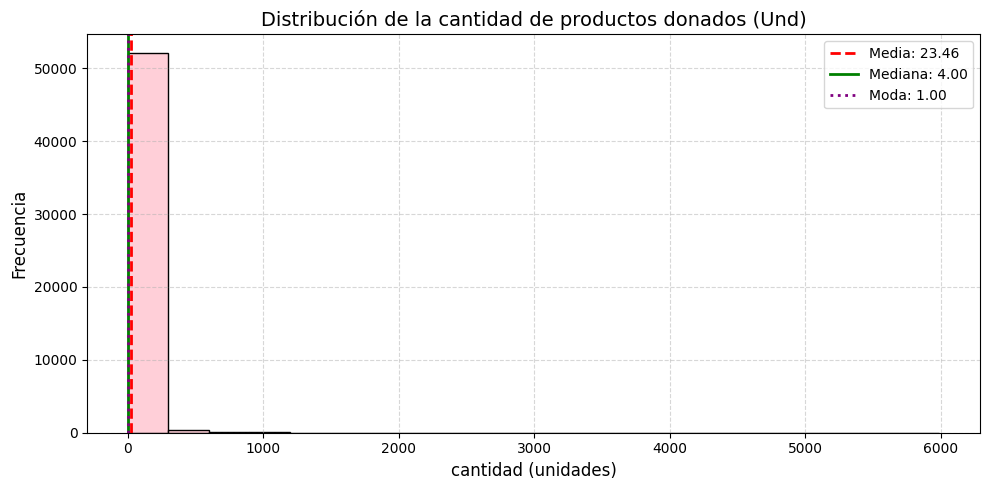


📊 Medidas de tendencia central para 'valor':
Media:   122507.05 pesos
Mediana: 13622.50 pesos
Moda:    0.00 pesos


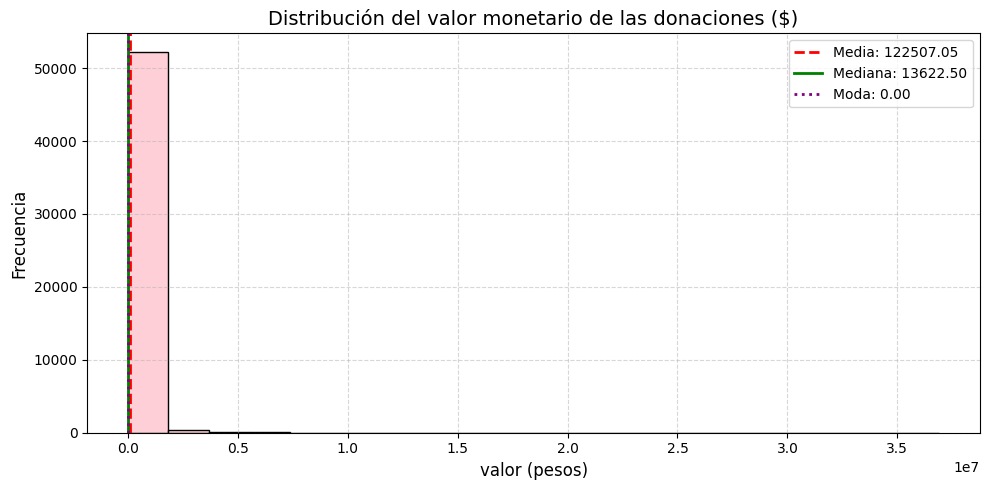


📊 Medidas de tendencia central para 'peso_kg':
Media:   0.40 kg
Mediana: 0.30 kg
Moda:    0.15 kg


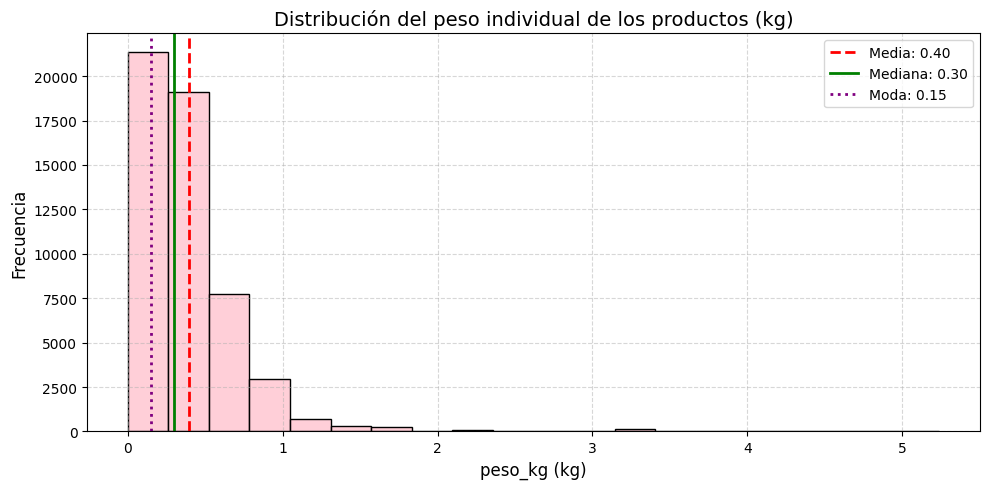


📊 Medidas de tendencia central para 'donacion_kg':
Media:   9.57 kg
Mediana: 1.20 kg
Moda:    0.30 kg


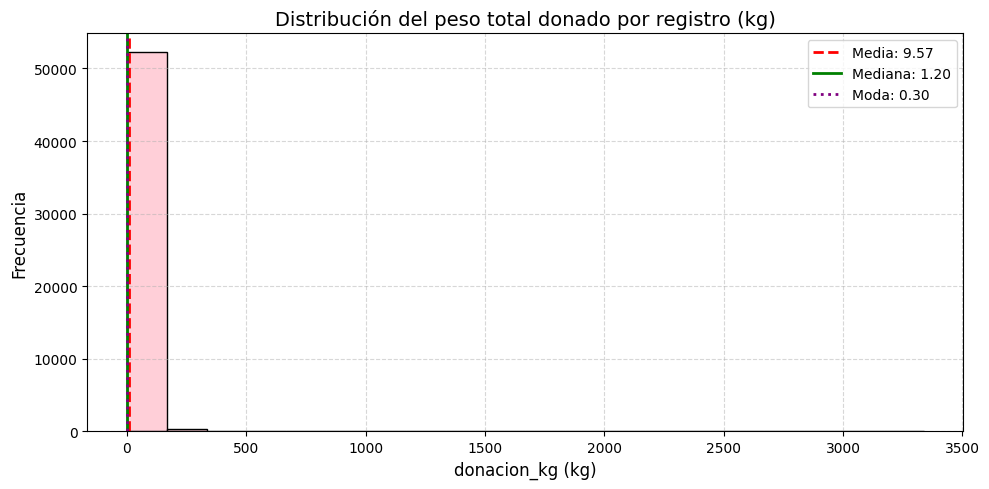

In [13]:
# Lista de variables continuas y sus unidades
variables = [
    ("cantidad", "unidades"),
    ("valor", "pesos"),
    ("peso_kg", "kg"),
    ("donacion_kg", "kg")
]

# Títulos descriptivos para cada variable
titulos = {
    "cantidad": "Distribución de la cantidad de productos donados (Und)",
    "valor": "Distribución del valor monetario de las donaciones ($)",
    "peso_kg": "Distribución del peso individual de los productos (kg)",
    "donacion_kg": "Distribución del peso total donado por registro (kg)"
}

# Iterar sobre cada variable y graficar
for columna, unidad in variables:
    # Medidas de tendencia central
    media = np.mean(df_nuevo[columna])
    mediana = np.median(df_nuevo[columna])
    moda = stats.mode(df_nuevo[columna], keepdims=True)[0][0]

    # Mostrar resultados
    print(f"\n📊 Medidas de tendencia central para '{columna}':")
    print(f"Media:   {media:.2f} {unidad}")
    print(f"Mediana: {mediana:.2f} {unidad}")
    print(f"Moda:    {moda:.2f} {unidad}")

    # Gráfica
    plt.figure(figsize=(10, 5))
    sns.histplot(df_nuevo[columna], bins=20, kde=False, color="#ffc0cb")

    # Líneas de tendencia central
    plt.axvline(media, color='red', linestyle='--', linewidth=2, label=f'Media: {media:.2f}')
    plt.axvline(mediana, color='green', linestyle='-', linewidth=2, label=f'Mediana: {mediana:.2f}')
    plt.axvline(moda, color='purple', linestyle=':', linewidth=2, label=f'Moda: {moda:.2f}')

    # Estética
    plt.title(titulos[columna], fontsize=14)
    plt.xlabel(f"{columna} ({unidad})", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


*Análisis*

En las gráficas de cantidad, valor y donacion_kg, afirman el análisis anterior con un comportamiento de valores elevados, con 50.000 el valor con mayor frecuencia en estas variables. Y por su parte en el peso individual se evidencia un comportamiento diferente, ya que aquí analizamos en peso de cada producto donado, en el que un peso muy bajo tiene la mayor cantidad de participación, menores a 1 kg, es por esto que la distribución se evidencia con una cola hacia la derecha.

**Medidas de dispersión**

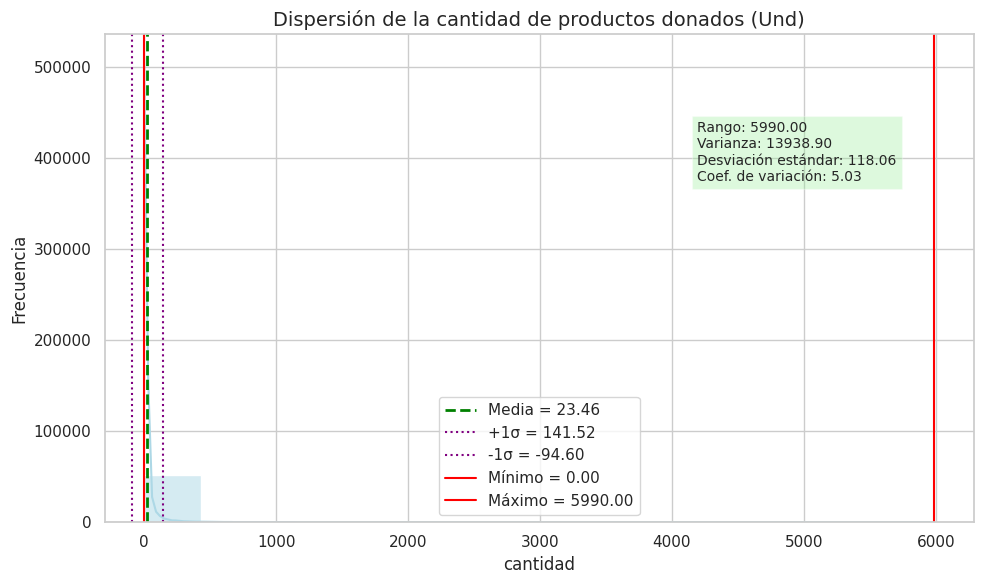

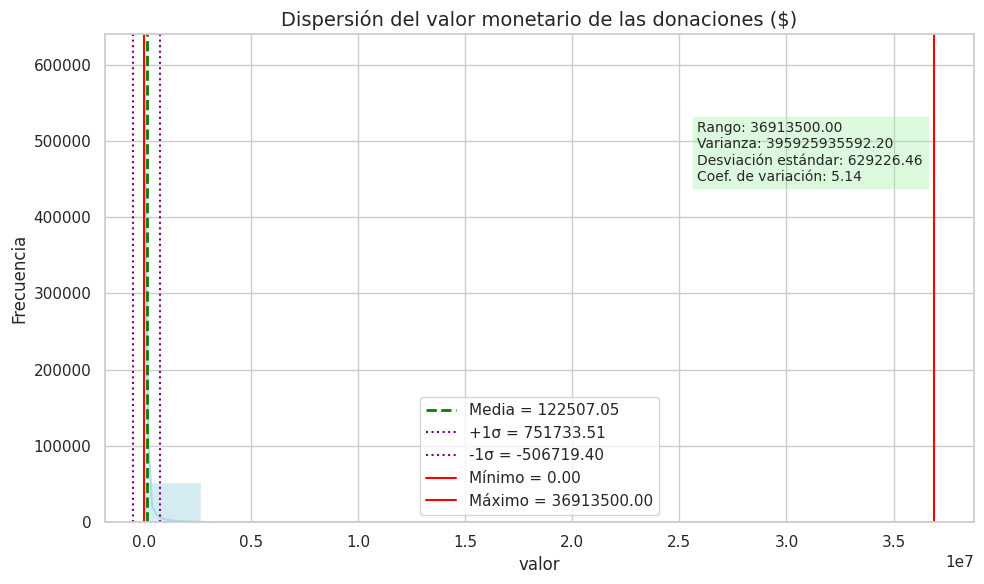

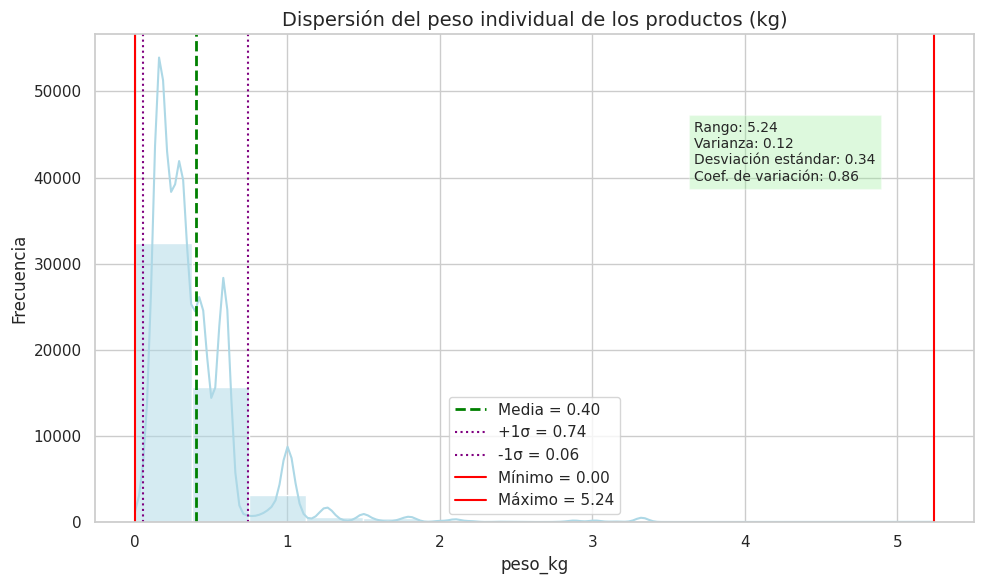

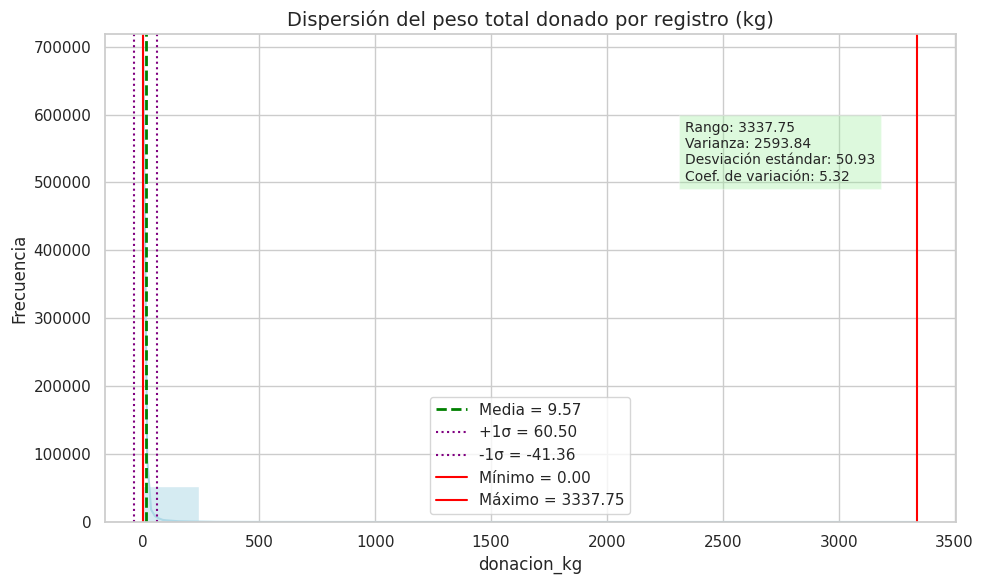

In [14]:
sns.set_theme(style="whitegrid")

# Variables continuas
variables = ['cantidad', 'valor', 'peso_kg', 'donacion_kg']

# Títulos descriptivos para cada variable
titulos = {
    "cantidad": "Dispersión de la cantidad de productos donados (Und)",
    "valor": "Dispersión del valor monetario de las donaciones ($)",
    "peso_kg": "Dispersión del peso individual de los productos (kg)",
    "donacion_kg": "Dispersión del peso total donado por registro (kg)"
}

# Iterar sobre cada variable
for var in variables:
    datos = df_nuevo[var].dropna()  # eliminar valores nulos

    # Medidas de dispersión
    media = np.mean(datos)
    minimo = np.min(datos)
    maximo = np.max(datos)
    rango = maximo - minimo
    varianza = np.var(datos, ddof=1)
    desviacion = np.std(datos, ddof=1)
    coef_var = desviacion / media if media != 0 else np.nan

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.histplot(datos, bins=14, kde=True, color='lightblue')

    # Líneas verticales
    plt.axvline(media, color='green', linestyle='--', linewidth=2, label=f'Media = {media:.2f}')
    plt.axvline(media + desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'+1σ = {media + desviacion:.2f}')
    plt.axvline(media - desviacion, color='purple', linestyle=':', linewidth=1.5, label=f'-1σ = {media - desviacion:.2f}')
    plt.axvline(minimo, color='red', linestyle='-', linewidth=1.5, label=f'Mínimo = {minimo:.2f}')
    plt.axvline(maximo, color='red', linestyle='-', linewidth=1.5, label=f'Máximo = {maximo:.2f}')

    # Título y etiquetas descriptivas
    plt.title(titulos[var], fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()

    # Recuadro con medidas de dispersión
    texto = (
        f"Rango: {rango:.2f}\n"
        f"Varianza: {varianza:.2f}\n"
        f"Desviación estándar: {desviacion:.2f}\n"
        f"Coef. de variación: {coef_var:.2f}"
    )
    plt.text(
        maximo - 0.3 * rango,              # posición más ajustada al gráfico
        plt.gca().get_ylim()[1] * 0.7,     # altura proporcional
        texto,
        bbox=dict(facecolor='lightgreen', alpha=0.3),
        fontsize=10
    )

    plt.tight_layout()
    plt.show()



*Análisis*

📊 Cantidad (Und)
La variable cantidad presenta una alta dispersión, con un rango muy amplio (5.990 unidades) y un coeficiente de variación de 5.03, lo que indica una gran variabilidad en el número de productos donados por registro. Aunque el promedio es bajo (23.46 unidades), existen registros con valores extremadamente altos, lo que sugiere la presencia de outliers o donaciones muy grandes en comparación con la mayoría.

💰 Valor ($)
El valor monetario de las donaciones muestra una dispersión muy elevada (CV = 5.14), con una desviación estándar que supera ampliamente la media. Esto indica una fuerte variabilidad en los montos donados: mientras algunos registros presentan valores bajos o nulos, otros alcanzan cifras muy altas (hasta 36,9 millones), evidenciando la existencia de donaciones muy altas en magnitud económica.

⚖️ Peso individual (kg)
El peso_kg tiene una variabilidad moderada (CV = 0.86). La mayoría de los productos pesan menos de medio kilo en promedio (0.40 kg), pero algunos alcanzan hasta 5.24 kg. Esta dispersión sugiere que existen tanto productos livianos (como unidades pequeñas o empaques individuales) como otros de mayor peso, posiblemente empaques múltiples o productos voluminosos.

📦 Donación total (kg)
El peso total donado por registro exhibe una alta dispersión (CV = 5.32), con un rango muy amplio (hasta 3.337,75 kg). Esto indica que las cantidades totales de peso donado por registro varían significativamente entre las observaciones, probablemente debido a diferencias en el tamaño de los envíos o el tipo de producto donado.

**Medidas de distriución**

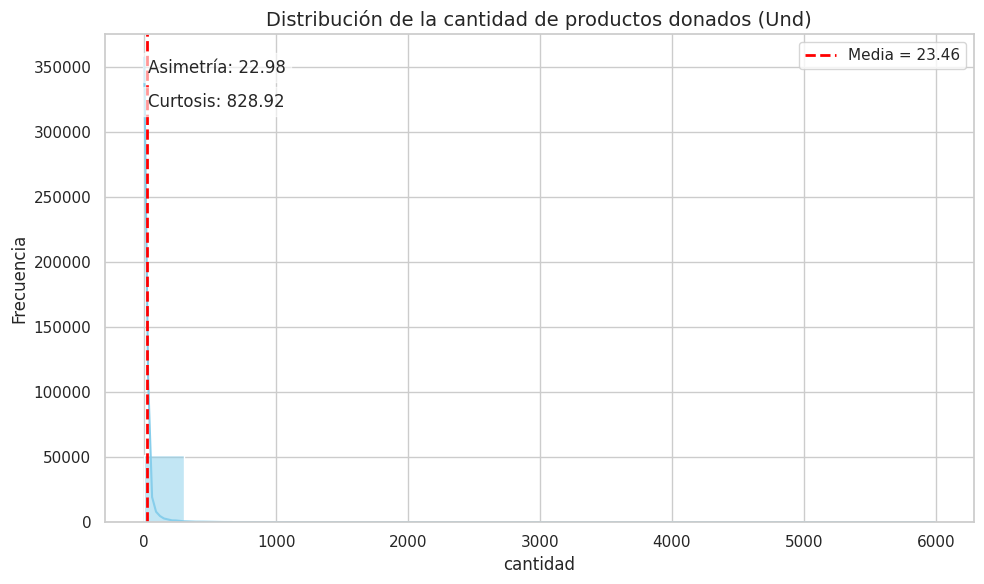

📈 Análisis de forma de la distribución para 'cantidad':
------------------------------------------------------------
La distribución es fuertemente asimétrica a la derecha (asimetría = 22.98), lo que sugiere la presencia de valores extremos altos.
Además, presenta una curtosis elevada (curtosis = 828.92), indicando colas más pesadas que una distribución normal.
------------------------------------------------------------



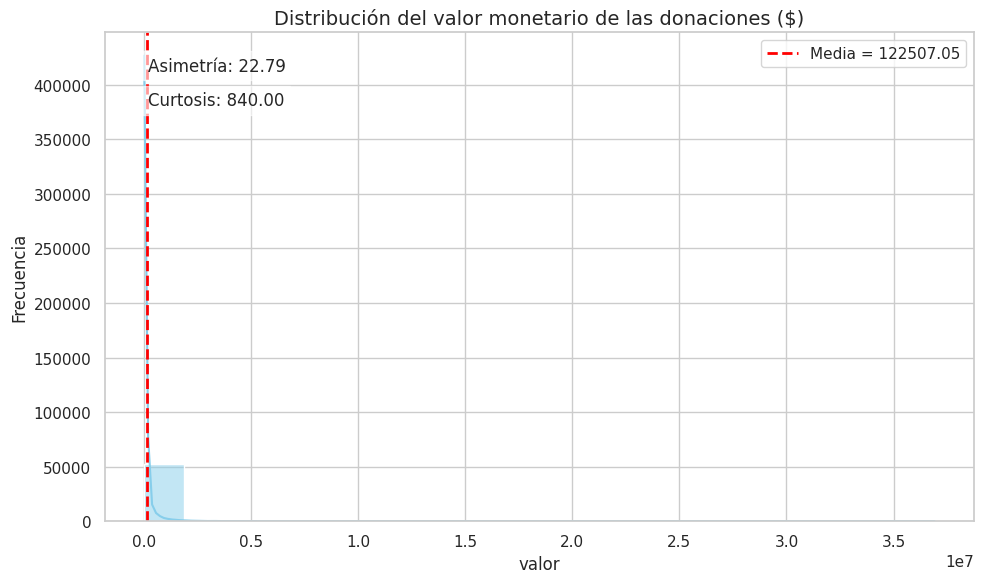

📈 Análisis de forma de la distribución para 'valor':
------------------------------------------------------------
La distribución es fuertemente asimétrica a la derecha (asimetría = 22.79), lo que sugiere la presencia de valores extremos altos.
Además, presenta una curtosis elevada (curtosis = 840.00), indicando colas más pesadas que una distribución normal.
------------------------------------------------------------



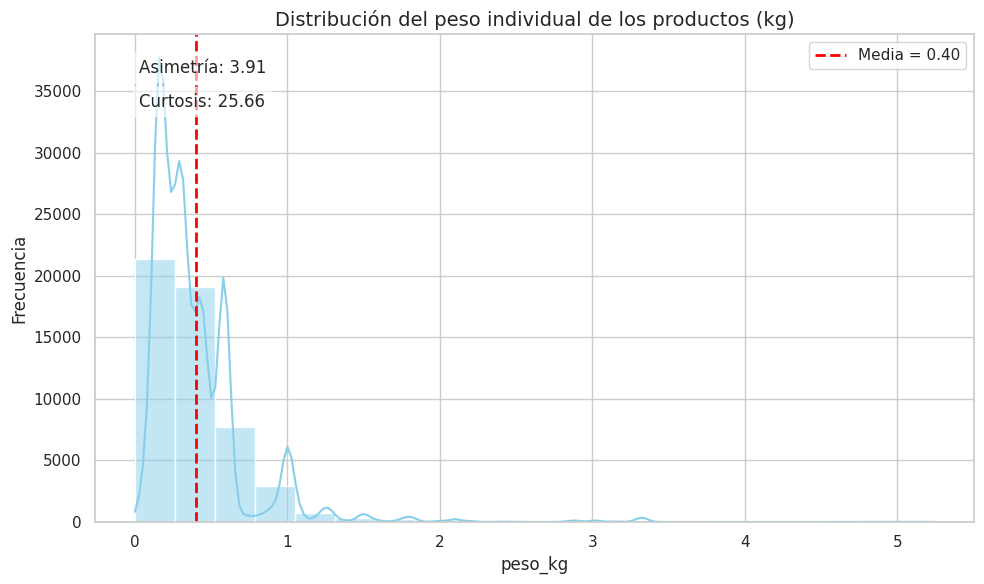

📈 Análisis de forma de la distribución para 'peso_kg':
------------------------------------------------------------
La distribución es fuertemente asimétrica a la derecha (asimetría = 3.91), lo que sugiere la presencia de valores extremos altos.
Además, presenta una curtosis elevada (curtosis = 25.66), indicando colas más pesadas que una distribución normal.
------------------------------------------------------------



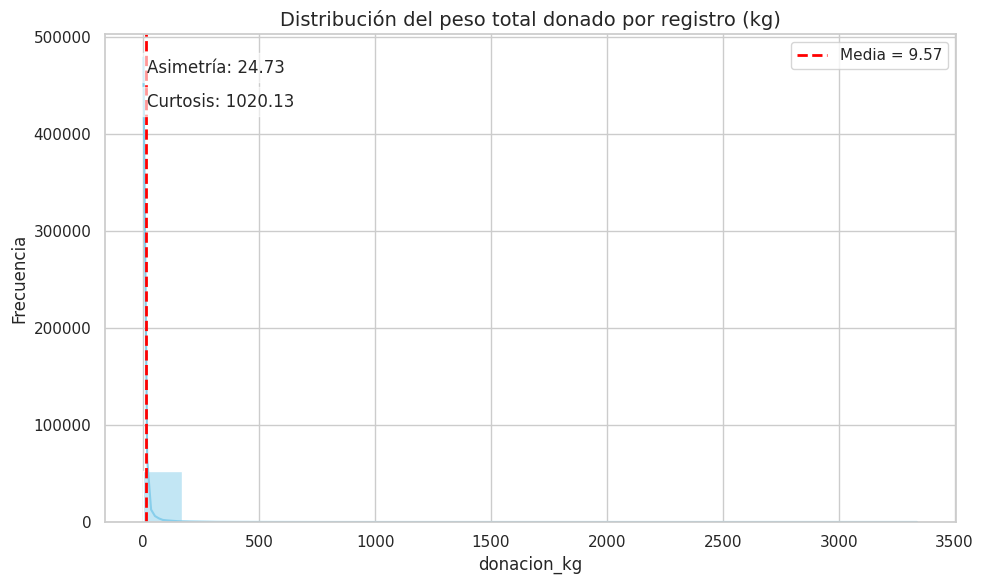

📈 Análisis de forma de la distribución para 'donacion_kg':
------------------------------------------------------------
La distribución es fuertemente asimétrica a la derecha (asimetría = 24.73), lo que sugiere la presencia de valores extremos altos.
Además, presenta una curtosis elevada (curtosis = 1020.13), indicando colas más pesadas que una distribución normal.
------------------------------------------------------------



In [15]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Variables continuas
variables = ['cantidad', 'valor', 'peso_kg', 'donacion_kg']

# Títulos descriptivos para cada variable
titulos = {
    "cantidad": "Distribución de la cantidad de productos donados (Und)",
    "valor": "Distribución del valor monetario de las donaciones ($)",
    "peso_kg": "Distribución del peso individual de los productos (kg)",
    "donacion_kg": "Distribución del peso total donado por registro (kg)"
}

# Iterar sobre cada variable
for var in variables:
    datos = df_nuevo[var].dropna()

    # Cálculo de asimetría y curtosis
    asimetria = skew(datos)
    curtosis_valor = kurtosis(datos)

    # Gráfico
    plt.figure(figsize=(10, 6))
    sns.histplot(datos, kde=True, color='skyblue', bins=20)
    plt.axvline(np.mean(datos), color='red', linestyle='--', linewidth=2, label=f'Media = {np.mean(datos):.2f}')

    # Anotaciones
    plt.text(0.05, 0.95, f"Asimetría: {asimetria:.2f}", transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))
    plt.text(0.05, 0.88, f"Curtosis: {curtosis_valor:.2f}", transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    plt.title(titulos[var], fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # --- Análisis automático ---
    print(f"📈 Análisis de forma de la distribución para '{var}':")
    print("------------------------------------------------------------")
    if asimetria > 1:
        print(f"La distribución es fuertemente asimétrica a la derecha (asimetría = {asimetria:.2f}), lo que sugiere la presencia de valores extremos altos.")
    elif 0.5 < asimetria <= 1:
        print(f"La distribución es moderadamente asimétrica a la derecha (asimetría = {asimetria:.2f}).")
    elif -1 < asimetria <= -0.5:
        print(f"La distribución es moderadamente asimétrica a la izquierda (asimetría = {asimetria:.2f}).")
    elif asimetria <= -1:
        print(f"La distribución es fuertemente asimétrica a la izquierda (asimetría = {asimetria:.2f}).")
    else:
        print(f"La distribución es aproximadamente simétrica (asimetría = {asimetria:.2f}).")

    if curtosis_valor > 3:
        print(f"Además, presenta una curtosis elevada (curtosis = {curtosis_valor:.2f}), indicando colas más pesadas que una distribución normal.")
    elif curtosis_valor < 0:
        print(f"Además, presenta una curtosis baja (curtosis = {curtosis_valor:.2f}), indicando una distribución más plana que la normal.")
    else:
        print(f"La curtosis ({curtosis_valor:.2f}) indica una forma cercana a la distribución normal.")

    print("------------------------------------------------------------\n")


# *Análisis Discretas*

# Limpieza

Se organizan las categorías que se encuentren duplicadas o escritas diferente.

In [16]:
df_nuevo['material'].unique()


[1001069, 1011774, 1035355, 1000145, 1020082, ..., 1071782, 1073576, 1073577, 1071570, 1073578]
Length: 668
Categories (668, int64): [0, 1000040, 1000043, 1000044, ..., 2024509, 2024510, 2031253, 2031254]

In [17]:
for valor in df_nuevo['motivo'].unique():
    print(valor)

d19
d88
d18
d28
d25
d24
vmu
vmw
234
vqm
d01
d41
d90
vaw
a15
d89


In [18]:
for valor in df_nuevo['planta'].unique():
    print(valor)

medellín
comprado
la ceja
caloto
amarre
bogotá
envigado
rionegro
la tebaida
setas
meals
medellin
armenia


In [19]:
df_nuevo['planta'] = df_nuevo['planta'].replace({
    'medellín': 'medellin'
})


/tmp/ipython-input-2660088993.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_nuevo['planta'] = df_nuevo['planta'].replace({


In [20]:
for valor in df_nuevo['centro'].unique():
    print(valor)

nn47
nnb1
nn86
nn85
nn60
nn21
nn18
nn14
nn20
nn56
nn52
nn58
nn13
nn51
nn24
nn55
nn78
nn76
nn54
nn49
nn53
nn29
nn68
nn97
nn63
nn69
nn75
ml88
nn28
nn57
nn91
nn93
nn84
nn22
nn65
nn59
nnq7
nn83
ml81
nn27
nns1
nn77
nn72
nn80
nn89
ml83
ml87
ml84
ml14
ml85
ml93
nnt4
nn17
ml89
nn88
nn96
nn87
nn81
ml74


In [21]:
for valor in df_nuevo['of_ventas'].unique():
    print(valor)

10
nan
20
17
12
13
14
11
25
r58
16
f64
0
r69
r51
r55
23
r57
00


In [22]:
df_nuevo['of_ventas'] = df_nuevo['of_ventas'].replace({
    '00': '0'
})

/tmp/ipython-input-284600516.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_nuevo['of_ventas'] = df_nuevo['of_ventas'].replace({


In [23]:
for valor in df_nuevo['categoria'].unique():
    print(valor)

alimentos larga vida
carnes frías
amarres especiales
carnes frescas
platos preparados
analogos carnicos
bebidas refrescantes
champiñones
pescados y mariscos
agroindustria
quesos
nan
lácteos
pasabocas
otros distribuidos
0


In [24]:
for valor in df_nuevo['subcategoria'].unique():
    print(valor)

larga vida cárnicos
tajados
nan
larga vida platos listos
larga vida vegetales
especiales
barras cortas 
amarres especiales larga vida
carnes marinadas y parrilleras
barras largas
refrigerados
amarres especiales cárnicos
amarres especiales carnes frías
otros cárnicos
otras proteina
congelados
jugos
nectar
amarres especiales helados
larga vida
pescado
larga vida atun
ingredientes especiales
amarres especiales platos preparados
otros distribuidos
0


In [25]:
for valor in df_nuevo['linea'].unique():
    print(valor)

salchichas larga vida
jamón
otros larga vida cárnicos
atún
granos
maíz larga vida
arveja larga vida
jamoneta
ensaladas
especialidades
salchicha
hamburguesas
pollo larga vida
amarres especiales larga vida
res
cerdo
tocineta
amarres especiales carnes frías
esparcibles y/o unta
chorizo y variedades
cervecero
salchichón
apanados
mortadela
otros platos listo larga vida
amarres especiales cárnicos
practicarne
proteina vegetal
pasabocas y panaderia
garrafa
bolsa
amarres especiales jugos
carnes procesadas
platos listos
otros tajados
nan
costilla
salsas y champiñones
vegetales
temporadas
p. salmón
pizzas
salsas y mermeladas
tajado larga vida
amarres especiales platos preparados
queso
p. atun
otros distribuidos
0


In [26]:
for valor in df_nuevo['marca'].unique():
    print(valor)

rica
zenú
pietrán
ranchera
cunit
country hill
setas de cuivá
meals de colombia
crujientes
alpina
nan
0


In [27]:
for valor in df_nuevo['demanda'].unique():
    print(valor)

lv ordinaria
d. ordinaria
lv extraordinaria
d. extraordinaria


In [28]:
for valor in df_nuevo['causales'].unique():
    print(valor)

baja rotación
salida almacenamiento
perdida de vacío
calidad
0
avería en operación
devolución de clientes
corta fecha - baja rotación
desguace comercial nutresa
medellín
bogotá
caloto
comprado
la tebaida
amarre
la ceja
envigado
rionegro
mp
averia transportes


/tmp/ipython-input-1255254802.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


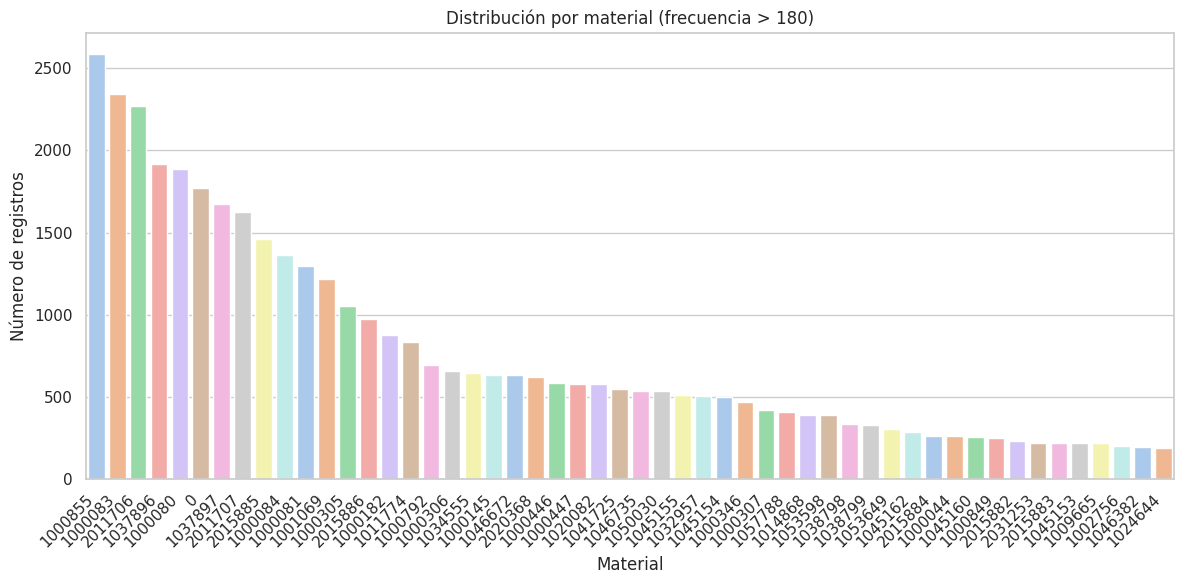

In [29]:
# Gráfico de barras: Material
plt.figure(figsize=(12,6))

# Filtrar materiales con más de 180 registros
val_counts = df_nuevo['material'].value_counts()
filtered_materials = val_counts[val_counts > 180].index

# Gráfico con solo esos materiales
sns.countplot(
    x='material',
    data=df_nuevo[df_nuevo['material'].isin(filtered_materials)],
    palette='pastel',
    legend=False,
    order=filtered_materials
)

plt.title("Distribución por material (frecuencia > 180)")
plt.xlabel("Material")
plt.ylabel("Número de registros")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



*Análisis*

En algunas categorías se evidencia que hay valores de "nan" y "0" en la misma categoría, en el proceso de imputación de datos se podrían tratar, por ejemplo unificarlos para su respectivo tratamiento. Se evidencian valores sobresalientes, por ejemplo, el motivo "d19", el centro "nn47", la oficina de ventas "10", la categoría "alimentos larga vida", la subcategoría "vegetales", la marca "zenú", la demanda "lv ordinaria", la causal "baja rotación", son las más sobresalientes dentro de sus variables, con respecto a otras categorías.

# *Análisis Bivariado*

> Add blockquote



/tmp/ipython-input-276875318.py:40: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


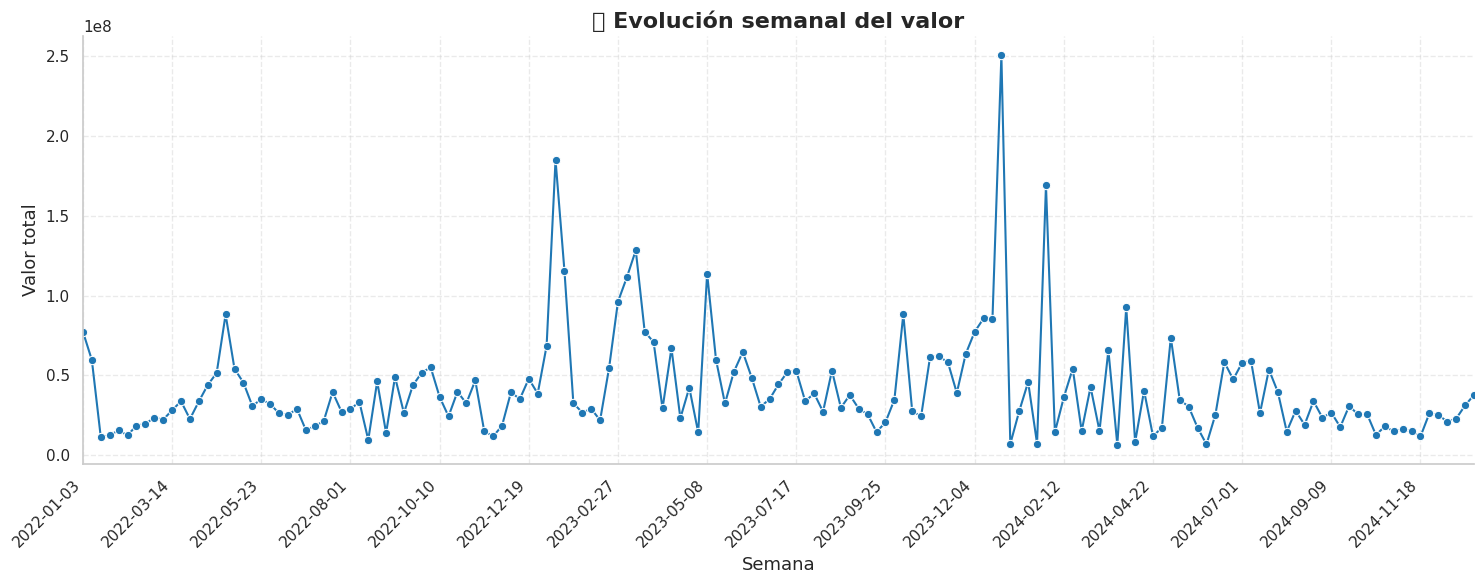

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.dates as mdates

# Asegurar que 'fecha' esté en formato datetime
df_nuevo["fecha"] = pd.to_datetime(df_nuevo["fecha"].astype(str), errors="coerce")
df_nuevo = df_nuevo.dropna(subset=["fecha"])

# Crear columna de semana (inicio de semana: lunes)
df_nuevo["semana"] = df_nuevo["fecha"].dt.to_period("W").apply(lambda r: r.start_time)

# Agrupar por semana y sumar valor total
df_semana = (
    df_nuevo.groupby("semana", observed=True)["valor"]
    .sum()
    .reset_index()
    .sort_values("semana")
)

# Gráfico de líneas
plt.figure(figsize=(15, 6))
sns.lineplot(data=df_semana, x="semana", y="valor", color="#1f77b4", linewidth=1.5, marker="o")

# Formato eje X
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))

plt.xlim(df_semana["semana"].iloc[0], df_semana["semana"].iloc[-1])
plt.xticks(df_semana["semana"][::max(1, len(df_semana)//15)], rotation=45, ha='right')

# Título y etiquetas
plt.title("📈 Evolución semanal del valor", fontsize=16, fontweight='bold')
plt.xlabel("Semana", fontsize=13)
plt.ylabel("Valor total", fontsize=13)

# Estilo
sns.despine()
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


*Análisis*

Los picos más altos se visualizan justamente en fechas de fin de año (2022 y 2023) y en los años 2023 y 2024 se puede observar un comportamiento embudo, de inicio de año valores altos y va disminuyendo a medida que avanza el tiempo.

/tmp/ipython-input-1358461932.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nuevo.groupby(col)["valor"]
/tmp/ipython-input-1358461932.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


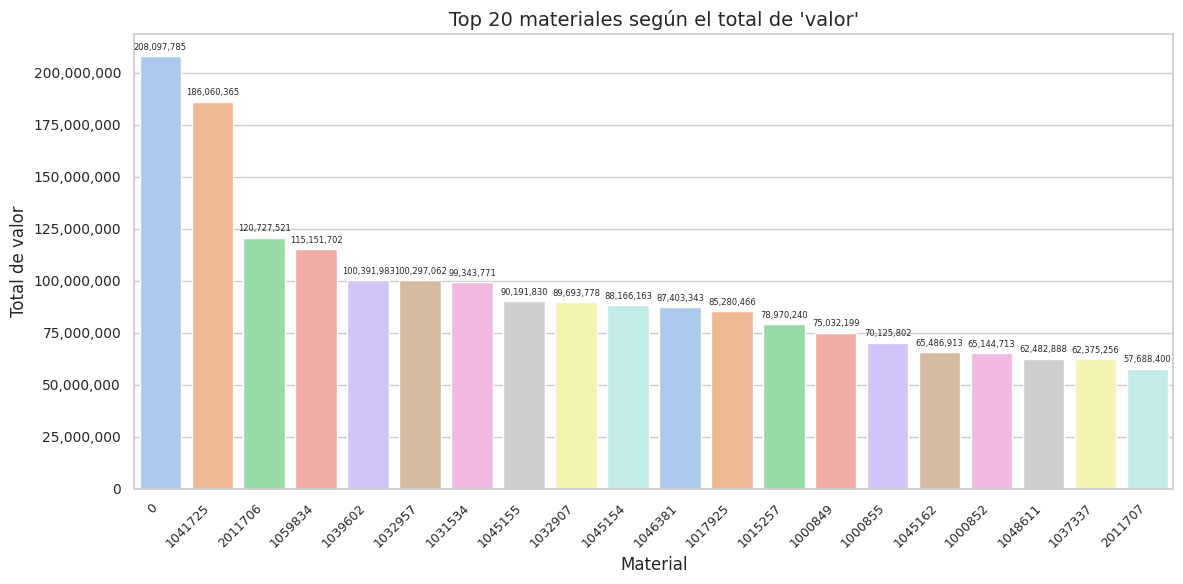

In [31]:
col = "material"

# Agrupar, sumar y ordenar
df_total = (
    df_nuevo.groupby(col)["valor"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Seleccionar el top 20
df_top20 = df_total.head(20)

# Gráfico
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=df_top20,
    x=col,
    y="valor",
    palette="pastel",
    order=df_top20[col]
)

plt.title(f"Top 20 materiales según el total de 'valor'", fontsize=14)
plt.xlabel("Material", fontsize=12)
plt.ylabel("Total de valor", fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar valores encima de las barras sin sobreescribir
for p in ax.patches:
    altura = p.get_height()
    # Colocar las etiquetas un poco arriba de la barra
    ax.text(
        p.get_x() + p.get_width() / 2,
        altura + (df_top20["valor"].max() * 0.01),  # espacio proporcional
        f"{altura:,.0f}",
        ha="center",
        va="bottom",
        fontsize=6,
        rotation=0
    )

# Reducir tamaño del eje y formatear los números con separador de miles
ax.tick_params(axis='x', labelsize=9)
ax.tick_params(axis='y', labelsize=10)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:,.0f}'))

plt.tight_layout()
plt.show()




*Análisis*
Que el material "0" "Salch. Viena ZENU  x 150 g" tenga el valor más alto, hay que validar con la fuente de información si ese material está bien escrito y así poder hacer zoom a este material porqué tiene el valor más alto a lo largo de 3 años.


📊 Top 15 categorías de 'motivo' según el total de 'valor':
   motivo         valor
0     d19  4.059833e+09
1     d18  5.976872e+08
2     vmw  4.475300e+08
3     d88  4.034331e+08
4     d28  2.459674e+08
5     vmu  1.905067e+08
6     d24  1.803483e+08
7     d01  1.364816e+08
8     a15  9.531624e+07
9     vqm  3.581559e+07
10    d25  3.458126e+07
11    234  1.845324e+07
12    d90  1.012454e+07
13    vaw  2.540371e+06
14    d41  6.212500e+05


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


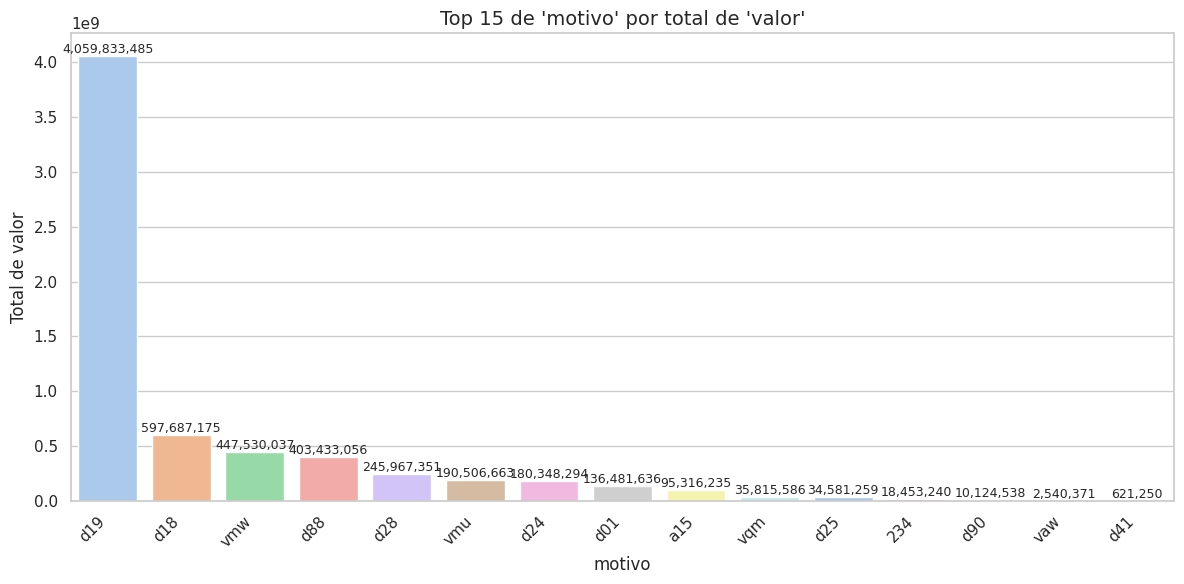


📊 Top 15 categorías de 'planta' según el total de 'valor':
        planta         valor
0     medellin  2.482970e+09
1       bogotá  1.377607e+09
2       caloto  9.920029e+08
3     envigado  4.588217e+08
4      la ceja  4.194745e+08
5     comprado  3.684297e+08
6       amarre  2.245241e+08
7     rionegro  7.763148e+07
8   la tebaida  5.472711e+07
9        meals  2.994808e+06
10       setas  7.506000e+04
11     armenia  4.875000e+04


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


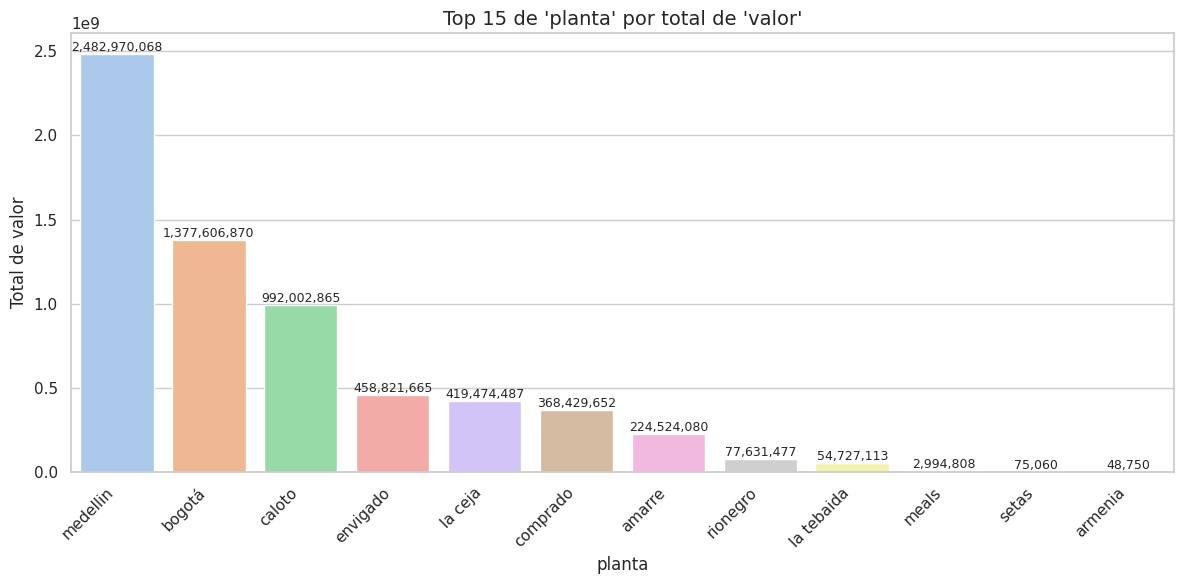


📊 Top 15 categorías de 'centro' según el total de 'valor':
   centro         valor
0    nn18  1.463100e+09
1    nn13  1.042292e+09
2    nn97  4.786931e+08
3    nn24  4.349030e+08
4    nn29  4.133748e+08
5    nn21  3.732730e+08
6    nn14  3.524207e+08
7    nn68  2.720839e+08
8    nn47  2.113661e+08
9    nn28  1.867196e+08
10   nn53  1.821332e+08
11   nn69  9.134786e+07
12   nn27  8.261338e+07
13   nn20  7.955775e+07
14   nn78  7.777092e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


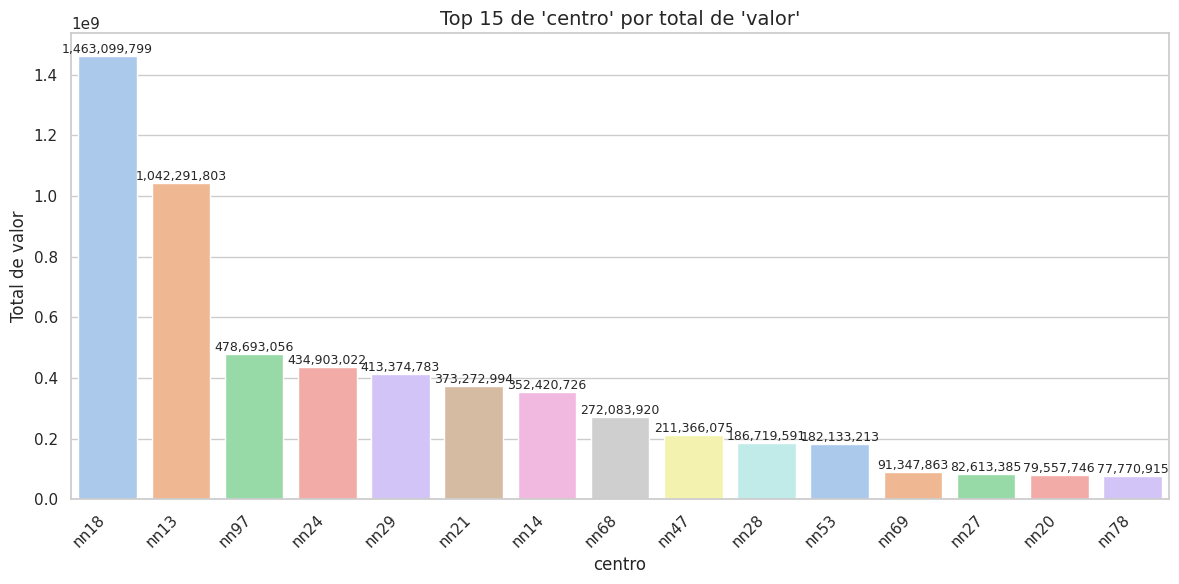


📊 Top 15 categorías de 'of_ventas' según el total de 'valor':
   of_ventas         valor
0         20  1.896510e+09
1         10  1.538807e+09
2         16  6.780039e+08
3         13  6.483743e+08
4         12  4.127356e+08
5         11  3.087674e+08
6         14  1.420101e+08
7         25  1.264371e+08
8        r58  1.136771e+08
9         17  5.369868e+07
10       f64  3.430530e+07
11        23  1.312407e+07
12       r69  6.830398e+06
13         0  4.238020e+05
14       r55  1.848920e+05


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


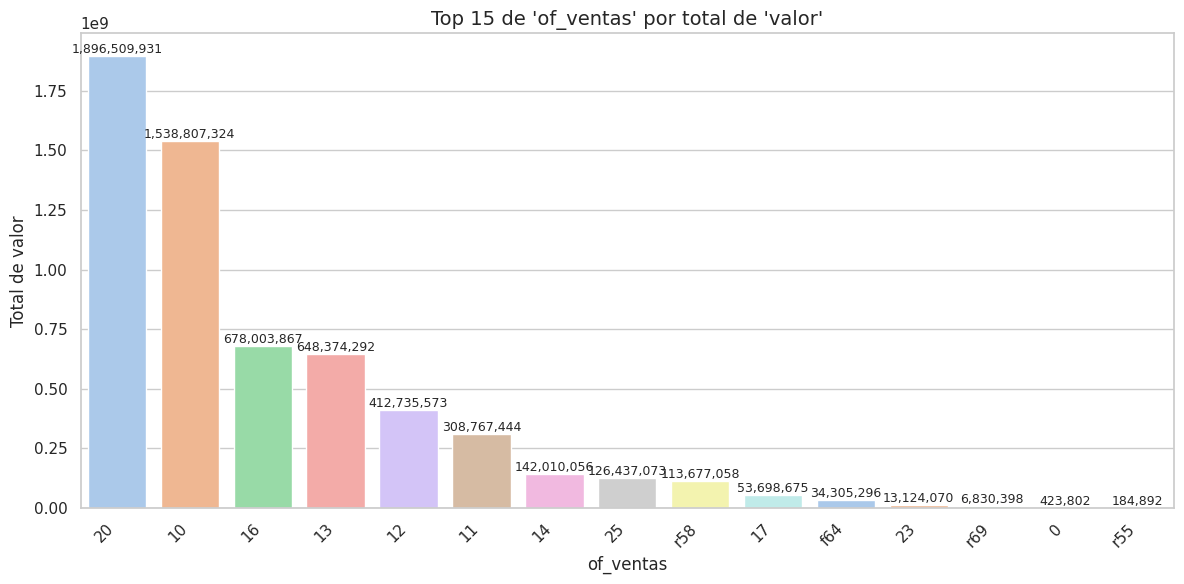


📊 Top 15 categorías de 'categoria' según el total de 'valor':
               categoria         valor
0           carnes frías  4.183015e+09
1   alimentos larga vida  1.145948e+09
2         carnes frescas  4.683587e+08
3     amarres especiales  3.177662e+08
4      platos preparados  1.131043e+08
5      analogos carnicos  1.063674e+08
6   bebidas refrescantes  4.741325e+07
7                lácteos  3.979174e+07
8                      0  2.399655e+07
9    pescados y mariscos  7.452589e+06
10             pasabocas  4.858840e+06
11                quesos  9.432470e+05
12         agroindustria  1.978270e+05
13           champiñones  8.559400e+04
14    otros distribuidos  8.358000e+03


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


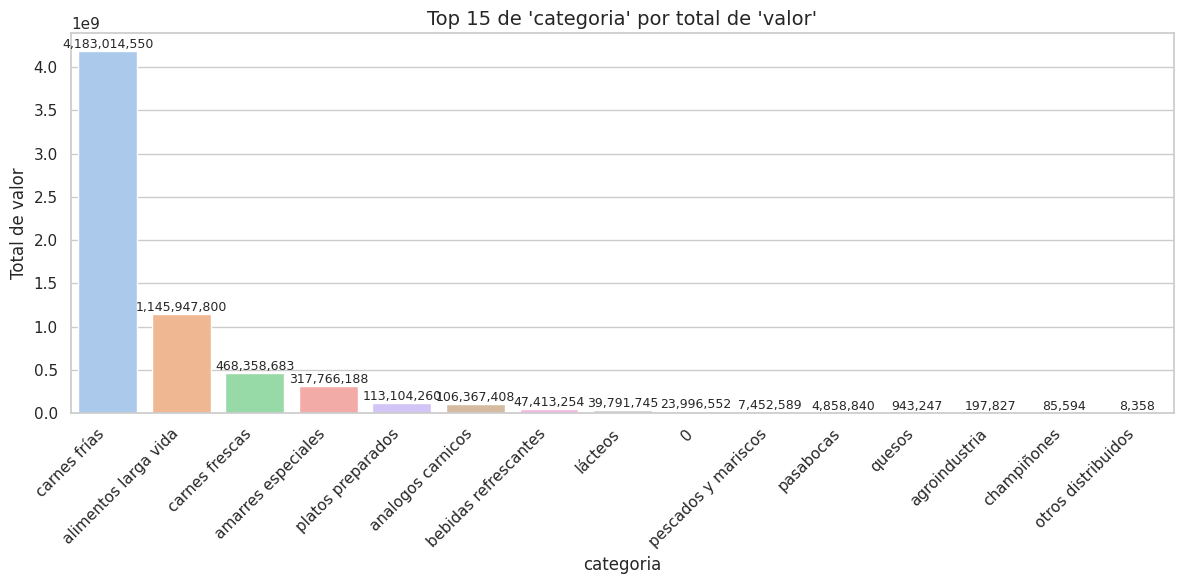


📊 Top 15 categorías de 'subcategoria' según el total de 'valor':
                       subcategoria         valor
0                    barras cortas   1.925713e+09
1                           tajados  1.111067e+09
2                        especiales  6.202920e+08
3              larga vida vegetales  4.289625e+08
4               larga vida cárnicos  3.302412e+08
5                     barras largas  2.667050e+08
6          larga vida platos listos  2.162350e+08
7   amarres especiales carnes frías  1.559043e+08
8                    otras proteina  4.799465e+07
9                      refrigerados  4.425571e+07
10    amarres especiales larga vida  4.306794e+07
11                       congelados  3.668028e+07
12   carnes marinadas y parrilleras  3.358083e+07
13                                0  2.399655e+07
14                            jugos  2.118650e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


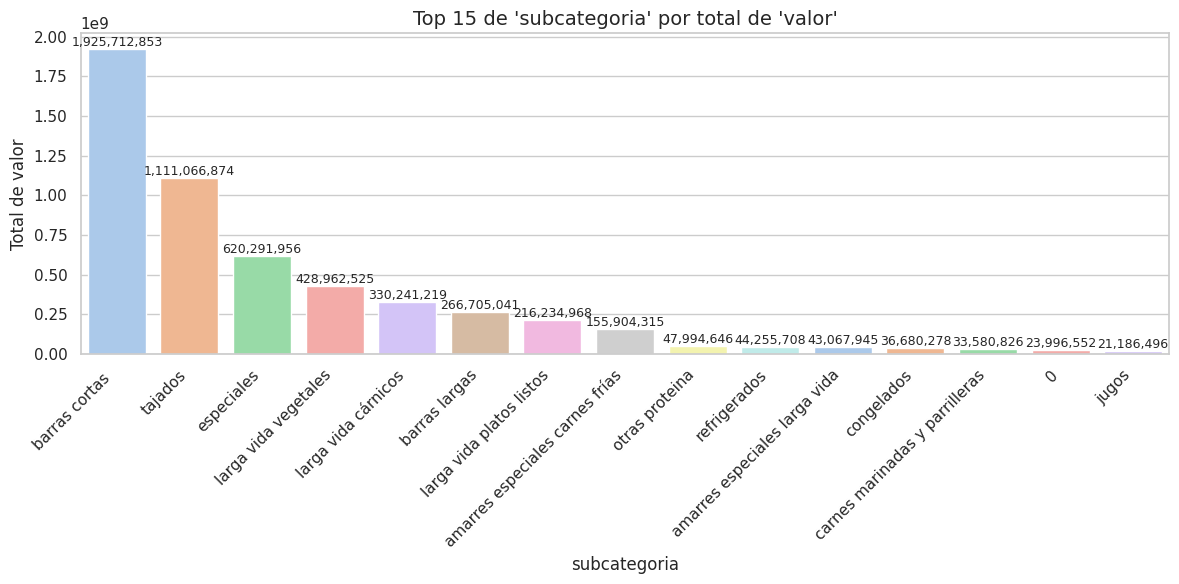


📊 Top 15 categorías de 'linea' según el total de 'valor':
                              linea         valor
0                         salchicha  1.416403e+09
1                             jamón  7.307256e+08
2              chorizo y variedades  5.653083e+08
3                        temporadas  3.461471e+08
4                    especialidades  2.741448e+08
5                          tocineta  2.699964e+08
6                             cerdo  2.459116e+08
7   amarres especiales carnes frías  2.422728e+08
8                   maíz larga vida  2.339106e+08
9             salchichas larga vida  2.142041e+08
10                        mortadela  1.935927e+08
11                        cervecero  1.928689e+08
12                              res  1.852976e+08
13                           granos  1.796759e+08
14                arveja larga vida  1.678526e+08


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


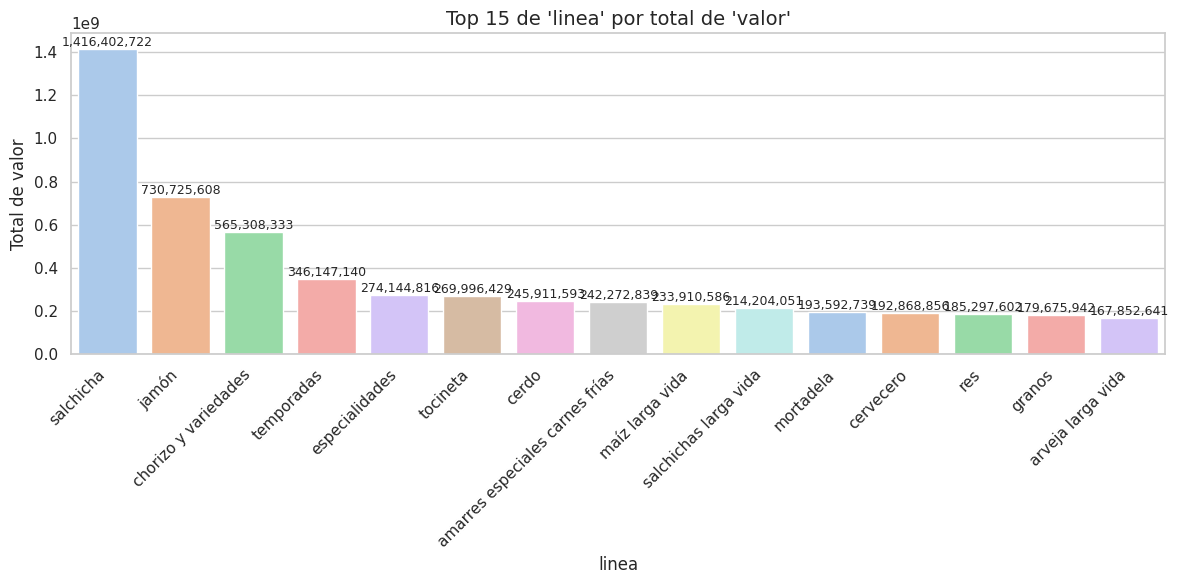


📊 Top 15 categorías de 'marca' según el total de 'valor':
                marca         valor
0                zenú  3.340167e+09
1            ranchera  1.425153e+09
2             pietrán  7.154340e+08
3               cunit  5.596530e+08
4                rica  3.310645e+08
5        country hill  5.769349e+07
6                   0  2.399655e+07
7              alpina  9.432470e+05
8   meals de colombia  1.978270e+05
9      setas de cuivá  7.506000e+04
10         crujientes  7.062800e+04


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


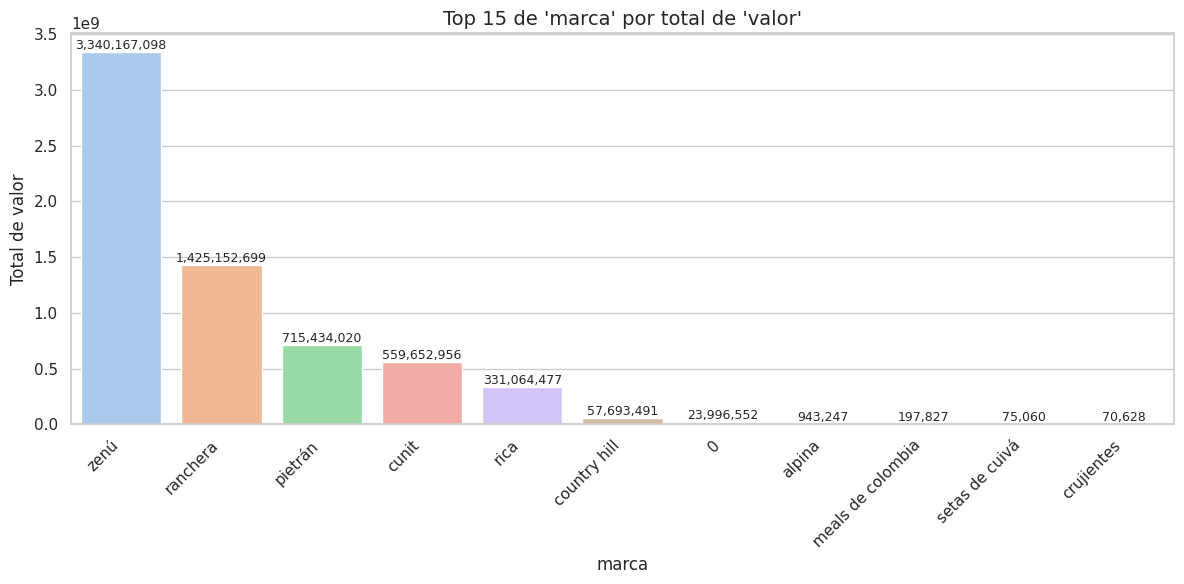


📊 Top 15 categorías de 'demanda' según el total de 'valor':
             demanda         valor
0       d. ordinaria  3.210140e+09
1  d. extraordinaria  1.983231e+09
2       lv ordinaria  1.238136e+09
3  lv extraordinaria  2.779925e+07


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


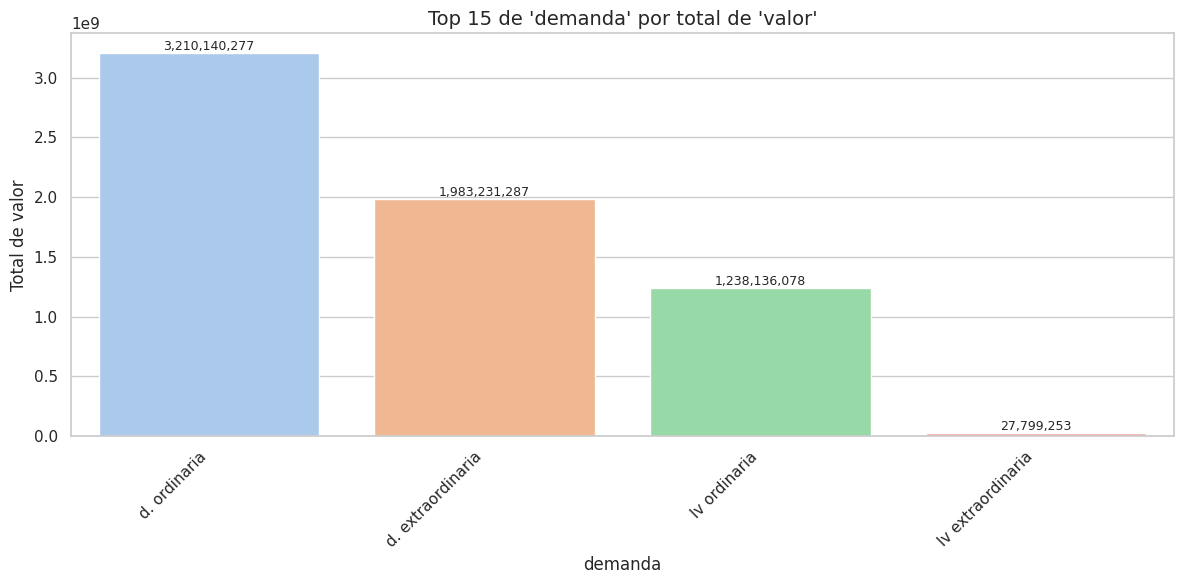


📊 Top 15 categorías de 'causales' según el total de 'valor':
                       causales         valor
0                 baja rotación  4.781897e+09
1                       calidad  3.497639e+08
2         salida almacenamiento  2.998371e+08
3                      medellín  2.353883e+08
4        devolución de clientes  1.682113e+08
5                        bogotá  1.258515e+08
6              perdida de vacío  1.231621e+08
7   corta fecha - baja rotación  9.531624e+07
8           avería en operación  7.827835e+07
9                       la ceja  7.159874e+07
10                            0  5.169008e+07
11                       caloto  3.796027e+07
12                       amarre  1.950044e+07
13                     envigado  5.998731e+06
14                   la tebaida  5.375930e+06


/tmp/ipython-input-3450948826.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


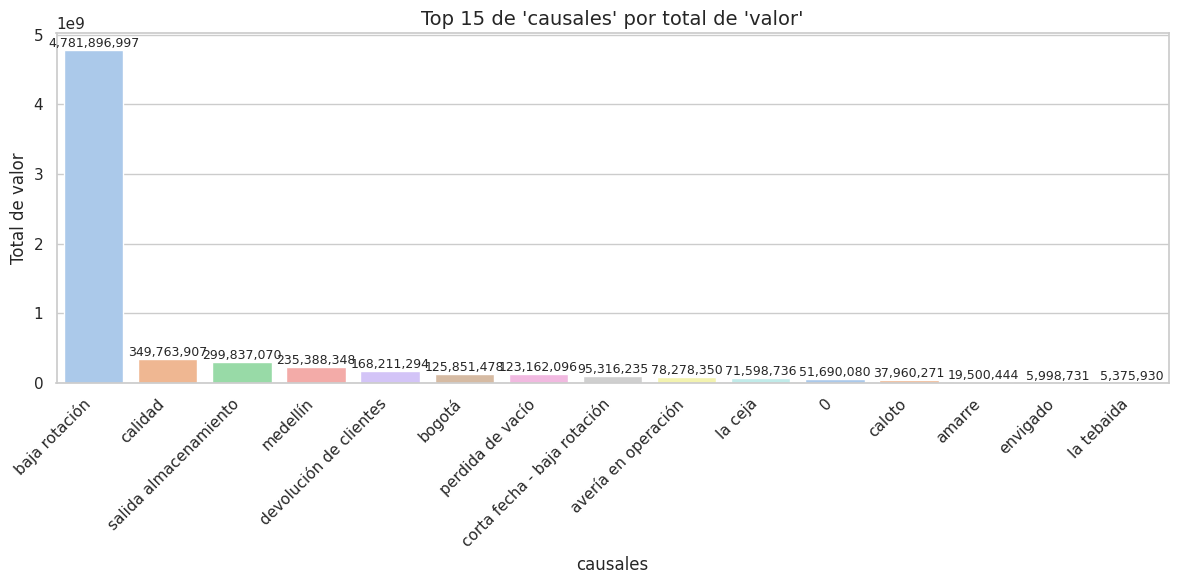

In [32]:
# Estilo visual
sns.set_theme(style="whitegrid")

# Variable continua a analizar
var_y = "valor"

# Lista de variables categóricas (excluyendo 'fecha' y 'material')
cat_cols = [
    col for col in df_nuevo.select_dtypes(include=['category']).columns
    if col not in ['fecha', 'material']
]

# Iterar sobre cada variable categórica
for col in cat_cols:
    # Agrupar y calcular el total de "valor"
    df_total = (
        df_nuevo.groupby(col, observed=True)[var_y]
        .sum()
        .sort_values(ascending=False)
        .reset_index()
    )

    # Tomar el top 15
    df_top15 = df_total.head(15)

    # Mostrar información
    print(f"\n📊 Top 15 categorías de '{col}' según el total de '{var_y}':")
    print(df_top15)

    # Graficar
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=df_top15,
        x=col,
        y=var_y,
        palette="pastel",
        order=df_top15[col]  # asegura el orden descendente
    )

    # Título y etiquetas
    plt.title(f"Top 15 de '{col}' por total de '{var_y}'", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel(f"Total de {var_y}", fontsize=12)
    plt.xticks(rotation=45, ha='right')

    # Mostrar valores sobre las barras
    for p in plt.gca().patches:
        plt.gca().annotate(
            f"{p.get_height():,.0f}",
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha='center', va='bottom', fontsize=9
        )

    plt.tight_layout()
    plt.show()


*Análisis*

El motivo de baja rotación es la causal más alta, es decir, que posiblemente es un problema de mercadeo. Siento la planta medellín la que tiene el valor más alto de donación, lo que hace interesante analizar el modelo en esta planta. Las carnes frías tiene más del 50% de categorías donadas, que es un punto interesante para los bancos de alimentos que son los más interesados. Siendo la línea de salchicha y la marca zenú la más donada, es decir, una marca de talla media en comparación con pietrán que el alta o rica que es gamma baja.

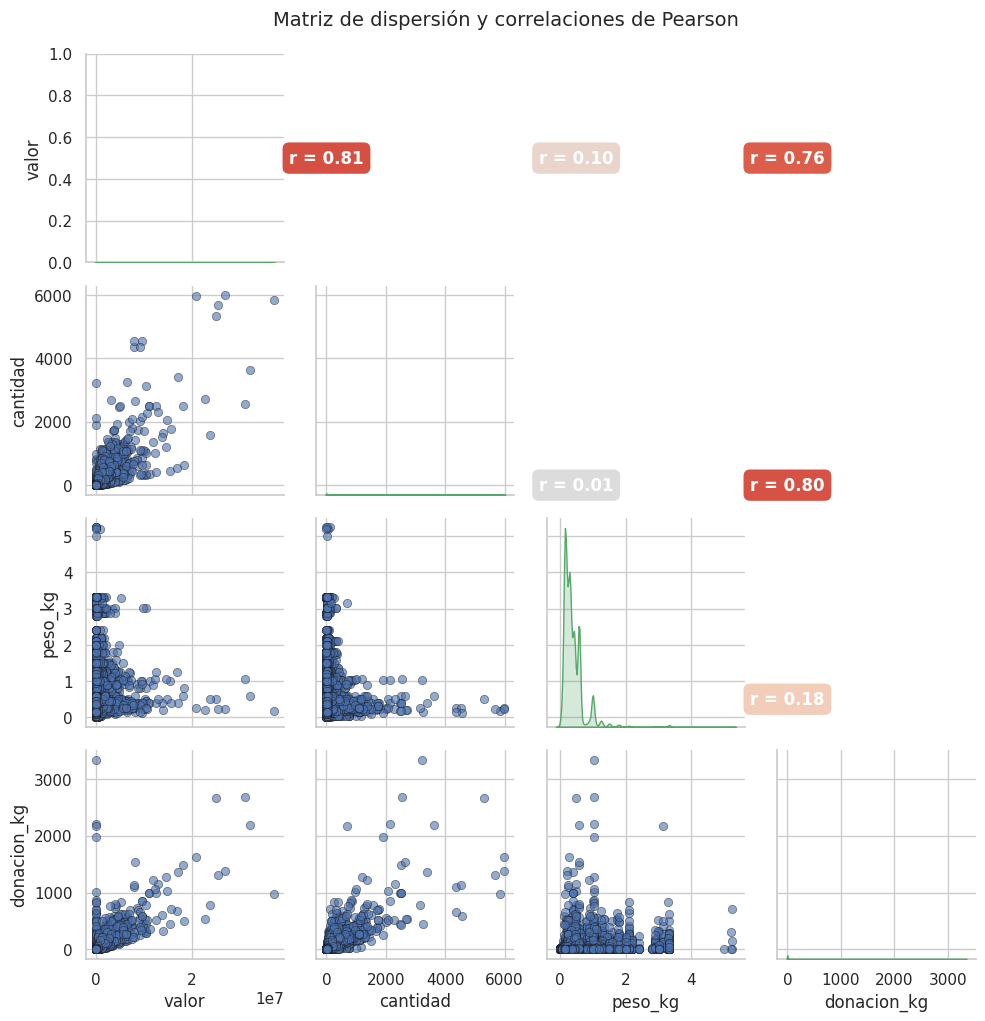

In [33]:
# --- Seleccionar las 4 variables continuas ---

variables_continuas = ["valor", "cantidad", "peso_kg", "donacion_kg"]

# --- Verificar que existan ---
for var in variables_continuas:
    if var not in df_nuevo.columns:
        raise ValueError(f"La columna '{var}' no existe en el DataFrame.")

# --- Configurar estilo gráfico ---
sns.set(style="whitegrid", context="notebook")

# --- Crear el PairGrid para personalización ---
g = sns.PairGrid(df_nuevo[variables_continuas])
g.map_lower(sns.scatterplot, color="#4C72B0", alpha=0.6, edgecolor="k")
g.map_diag(sns.kdeplot, fill=True, color="#55A868")

# --- Función para mostrar correlaciones con color dinámico ---
def corr_coefs(x, y, **kwargs):
    r = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.set_axis_off()
    # Colorear según la intensidad de la correlación
    color = sns.color_palette("coolwarm", as_cmap=True)( (r + 1) / 2 )
    ax.text(0.5, 0.5, f"r = {r:.2f}",
            ha="center", va="center", fontsize=12,
            color="white", weight="bold",
            bbox=dict(facecolor=color, edgecolor="none", boxstyle="round,pad=0.4"))

# --- Asignar correlaciones en la parte superior ---
g.map_upper(corr_coefs)

# --- Título general ---
plt.suptitle("Matriz de dispersión y correlaciones de Pearson", y=1.02, fontsize=14)

plt.show()



# *Análisis Multivariado*


=== Varianza explicada por componente ===
PC1: 60.68%
PC2: 33.24%
PC3: 6.07%

=== Cargas de cada variable ===


,PC1,PC2,PC3
cantidad,0.688676,-0.223674,-0.689707
peso_kg,0.163048,0.974640,-0.153274
donacion_kg,0.706499,-0.006899,0.707681


,Componente,Autovalor,PVE,PVE acumulada
0,PC1,1.820524,0.606830,0.60683
1,PC2,0.997281,0.332421,0.93925
2,PC3,0.182252,0.060750,1.00000


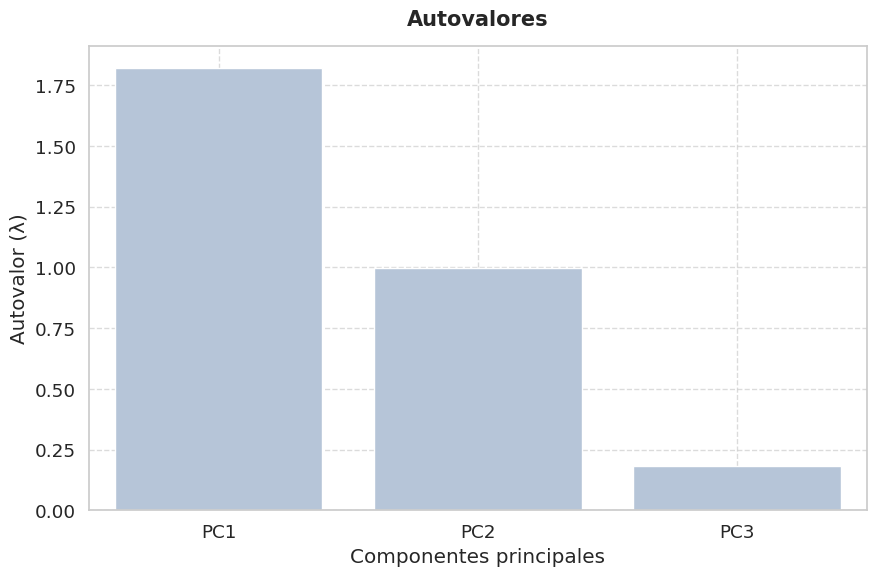

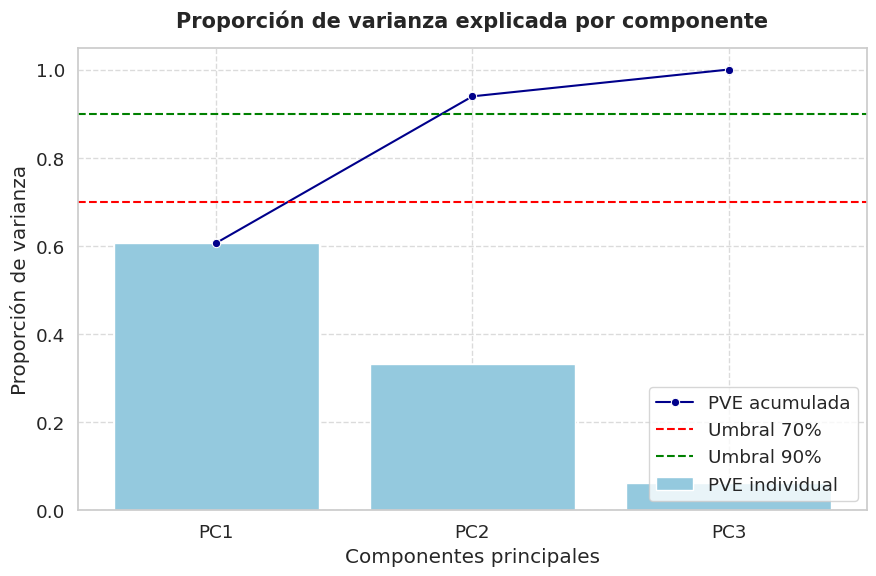

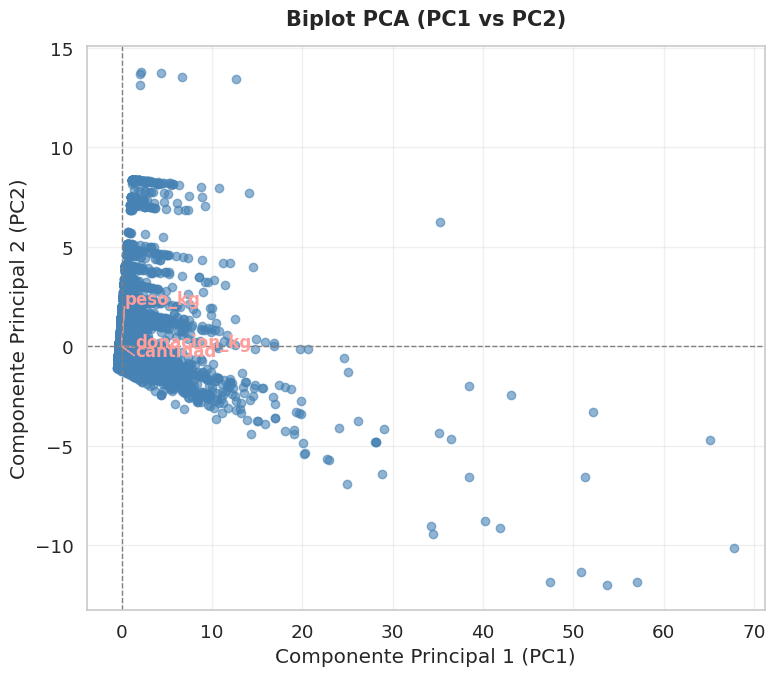

In [37]:
# Análisis de Componentes Principales (PCA)
# Variables: 'cantidad', 'peso_kg', 'donacion_kg'

# --- Configuración visual ---
sns.set(style="whitegrid", palette="pastel", font_scale=1.2)
plt.rcParams['figure.figsize'] = (9, 6)
plt.rcParams['axes.titlepad'] = 15  # espacio extra entre título y gráfico

# --- Seleccionar variables ---
variables = ["cantidad", "peso_kg", "donacion_kg"]
X = df_nuevo[variables].dropna()

# --- Estandarizar ---
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# --- PCA ---
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_std)

# --- Resultados principales ---
print("\n=== Varianza explicada por componente ===")
for i, var in enumerate(pca.explained_variance_ratio_):
    print(f"PC{i+1}: {var:.2%}")

# --- Cargas ---
cargas = pd.DataFrame(
    pca.components_.T,
    index=variables,
    columns=[f"PC{i+1}" for i in range(pca.n_components_)]
)
print("\n=== Cargas de cada variable ===")
display(cargas)

# --- DataFrame de varianza ---
varianza = pca.explained_variance_
PVE = pca.explained_variance_ratio_
PVE_acum = np.cumsum(PVE)
componentes = [f'PC{i+1}' for i in range(len(PVE))]

df_varianza = pd.DataFrame({
    'Componente': componentes,
    'Autovalor': varianza,
    'PVE': PVE,
    'PVE acumulada': PVE_acum
})

display(df_varianza)

# ======================================================
# GRÁFICO 1: Autovalores
# ======================================================
plt.figure(figsize=(9, 6))
sns.barplot(x='Componente', y='Autovalor', data=df_varianza, color='lightsteelblue')
plt.title('Autovalores', fontsize=15, weight='bold')
plt.ylabel('Autovalor (λ)')
plt.xlabel('Componentes principales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# ======================================================
# GRÁFICO 2: Proporción de varianza explicada
# ======================================================
plt.figure(figsize=(9, 6))
sns.barplot(x='Componente', y='PVE', data=df_varianza, color='skyblue', label='PVE individual')
sns.lineplot(x='Componente', y='PVE acumulada', data=df_varianza, marker='o', color='darkblue', label='PVE acumulada')
plt.axhline(0.7, color='red', linestyle='--', label='Umbral 70%')
plt.axhline(0.9, color='green', linestyle='--', label='Umbral 90%')
plt.title('Proporción de varianza explicada por componente', fontsize=15, weight='bold')
plt.ylabel('Proporción de varianza')
plt.xlabel('Componentes principales')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
plt.close()

# ======================================================
# GRÁFICO 3: Biplot (PC1 vs PC2)
# ======================================================
plt.figure(figsize=(8, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, color="steelblue")

# vectores de carga
for i, var in enumerate(variables):
    plt.arrow(0, 0,
              pca.components_[0, i]*2,
              pca.components_[1, i]*2,
              color='r', alpha=0.8, head_width=0.05)
    plt.text(pca.components_[0, i]*2.2,
             pca.components_[1, i]*2.2,
             var, color='r', fontsize=12, weight='bold')

plt.xlabel("Componente Principal 1 (PC1)")
plt.ylabel("Componente Principal 2 (PC2)")
plt.title("Biplot PCA (PC1 vs PC2)", fontsize=15, weight='bold')
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.axvline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()





De acuerdo con el análisis de PCA, las tres variables incluídas se podrían reducir en dos factores principales que explican hasta un 93% de la información. Esta podría ser una buena práctica para poder reducir la dimensionalidad de la base de datos.

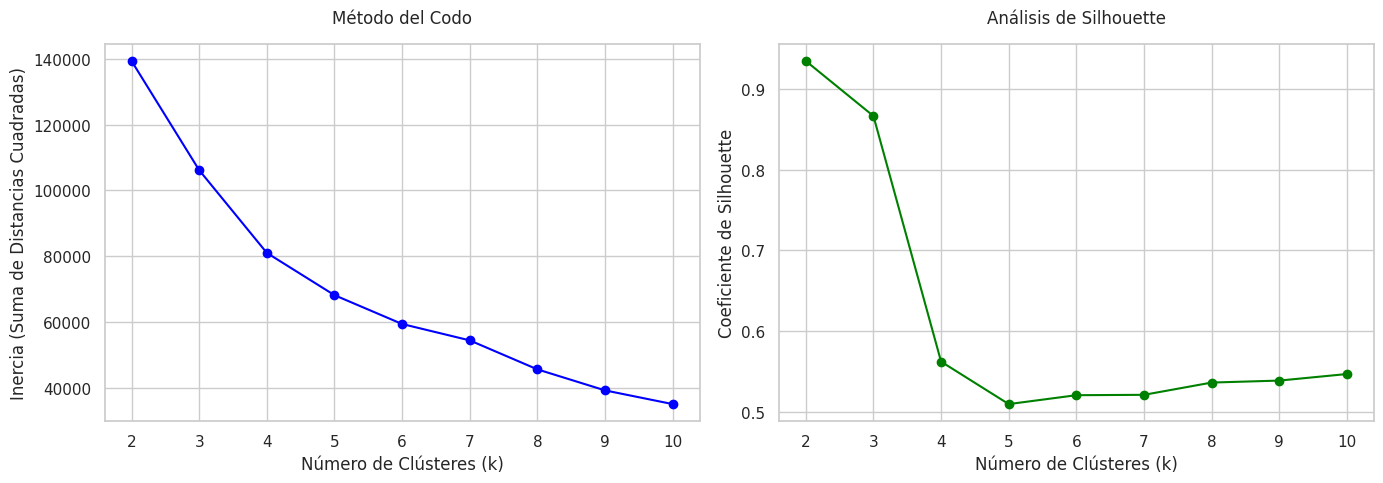

Número de clústeres: 3
cluster_kmeans
0    51925
1      765
2       36
Name: count, dtype: int64


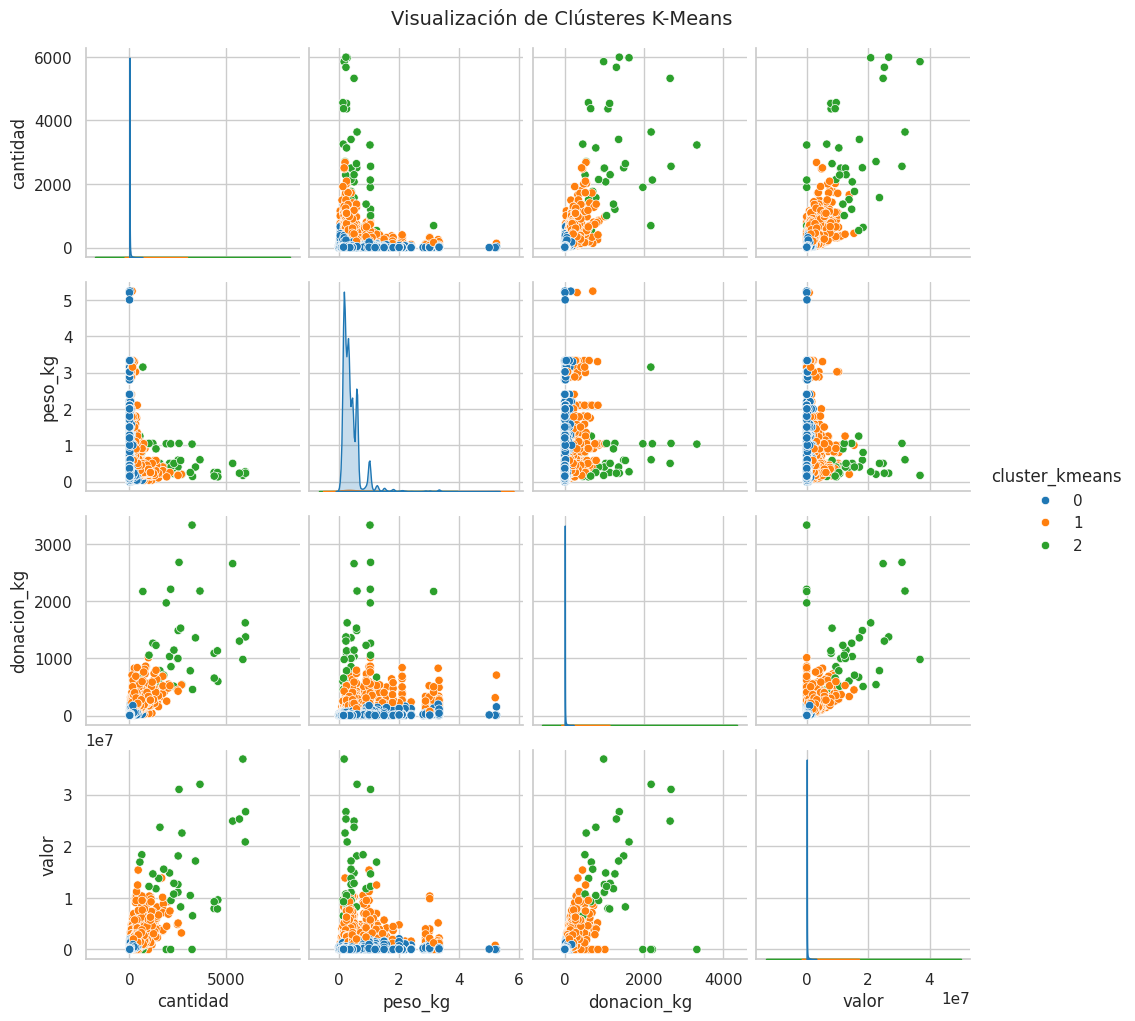

,cantidad,peso_kg,donacion_kg,valor
cluster_kmeans,,,,
0,14.205758,0.393624,5.482169,7.334907e+04
1,516.380392,0.689242,227.670758,2.778570e+06
2,2897.333333,0.595000,1264.898889,1.458472e+07


,cantidad,peso_kg,donacion_kg,valor
cluster_kmeans,,,,
0,14.205758,0.393624,5.482169,7.334907e+04
1,516.380392,0.689242,227.670758,2.778570e+06
2,2897.333333,0.595000,1264.898889,1.458472e+07


In [45]:
# ===========================================
# Análisis de Clúster con K-Means
# ===========================================

# Configuración de estilo gráfico
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.family'] = 'DejaVu Sans'


# --- Seleccionar variables numéricas ---
variables = ['cantidad', 'peso_kg', 'donacion_kg', 'valor']
df_cluster = df_nuevo[variables].dropna()

# --- Estandarización ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# --- Determinar número óptimo de clústeres (Método del codo y silhouette) ---
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))

# --- Gráfica del método del codo ---
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(K, inertia, 'o-', color='blue')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (Suma de Distancias Cuadradas)')
plt.title('Método del Codo')

# --- Gráfica del silhouette ---
plt.subplot(1,2,2)
plt.plot(K, silhouette, 'o-', color='green')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Coeficiente de Silhouette')
plt.title('Análisis de Silhouette')

plt.tight_layout()
plt.show()

# --- Ajuste final del modelo  ---
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
df_nuevo['cluster_kmeans'] = kmeans_final.fit_predict(X_scaled)

# --- Resultados ---
print(f"Número de clústeres: {k_optimo}")
print(df_nuevo['cluster_kmeans'].value_counts())

# --- Visualización: pares de variables ---
sns.pairplot(df_nuevo, vars=variables, hue='cluster_kmeans', palette='tab10')
plt.suptitle('Visualización de Clústeres K-Means', y=1.02, fontsize=14)
plt.show()

# --- Promedio de variables por clúster ---
cluster_summary = df_nuevo.groupby('cluster_kmeans')[variables].mean()
display(cluster_summary)

# --- Promedio de variables por clúster ---
cluster_summary = df_nuevo.groupby('cluster_kmeans')[variables].mean()
display(cluster_summary)


El algoritmo K-Means identificó tres grupos bien diferenciados dentro del conjunto de datos, caracterizados por distintos niveles de magnitud en producción, peso, donaciones y valor económico:

Clúster 0 – Bajo volumen: presenta los valores promedio más bajos (cantidad ≈ 14, donación_kg ≈ 5.5, valor ≈ 73 mil). Representa operaciones pequeñas o transacciones de rutina.

Clúster 1 – Volumen medio: muestra un incremento significativo (cantidad ≈ 516, donación_kg ≈ 228, valor ≈ 2.78 millones), asociado a actividades de mayor escala.

Clúster 2 – Alto volumen: concentra los valores más elevados (cantidad ≈ 2.897, donación_kg ≈ 1.265, valor ≈ 14.58 millones), lo que sugiere operaciones de gran impacto o eventos excepcionales de producción/donación.

En conjunto, el modelo evidencia una segmentación clara, útil para clasificar los registros en categorías de baja, media y alta escala.

# **7. Detección y análisis de atípicos**

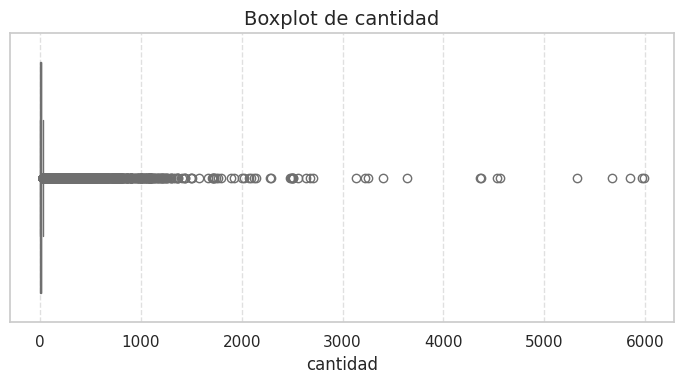

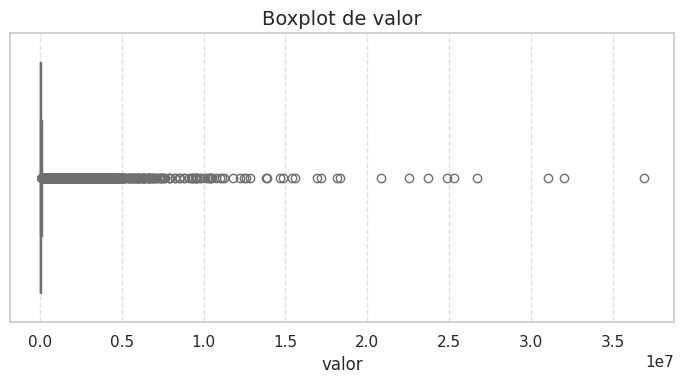

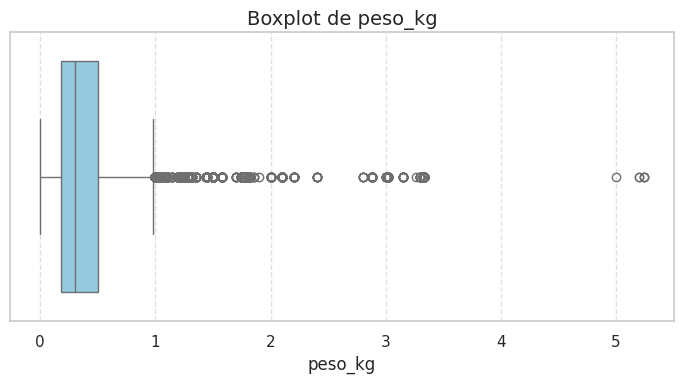

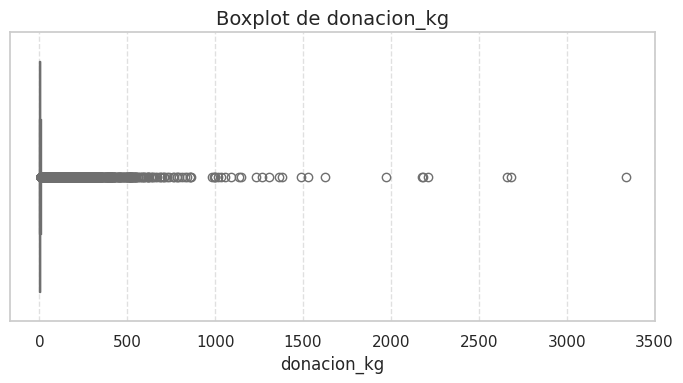

In [ ]:
# Variables a graficar
variables = ["cantidad", "valor", "peso_kg", "donacion_kg"]

# Graficar un boxplot independiente por variable en forma horizontal
for col in variables:
    plt.figure(figsize=(7, 4))
    sns.boxplot(x=df_nuevo[col], color="#87CEEB")
    plt.title(f"Boxplot de {col}", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.grid(axis="x", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()


De acuerdo con las gráficas presentadas del Box Plot, se podría decir que las tres variables tienen un alto número de datos atípicos, o también puede ser qe sean pocos en comparación con el tamaño de la muestra, pero su valor es muy alto, lo que hace que estén sesgados hacia la derecha.

# *IQR*

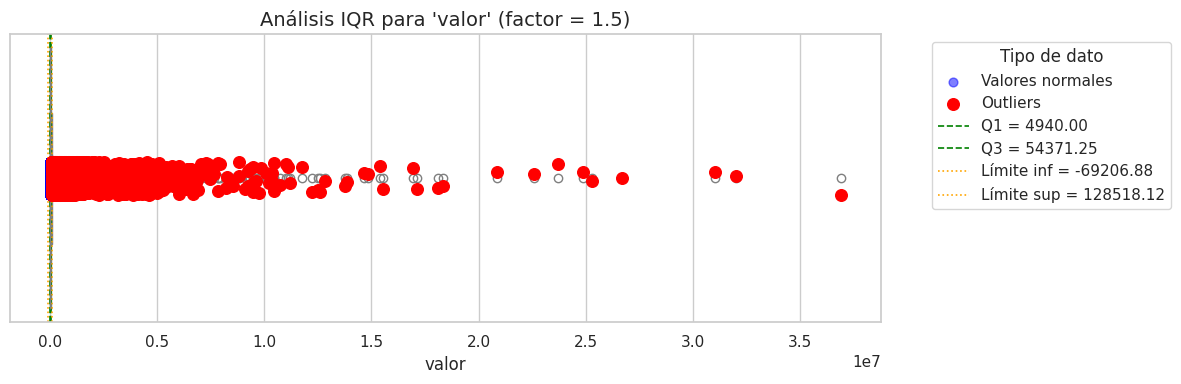


📊 Variable: valor
Q1 = 4940.00, Q3 = 54371.25, IQR = 49431.25
Límite inferior: -69206.88, Límite superior: 128518.12
Número de outliers detectados: 7528
----------------------------------------------------------------------


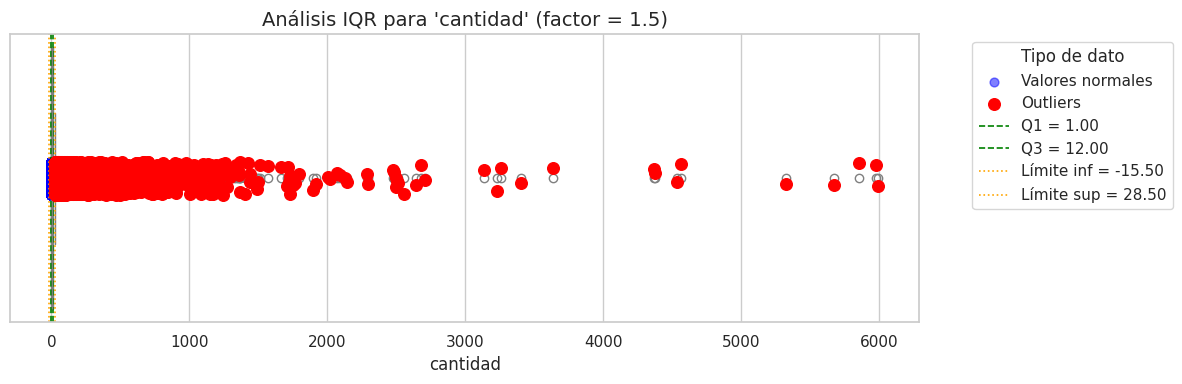


📊 Variable: cantidad
Q1 = 1.00, Q3 = 12.00, IQR = 11.00
Límite inferior: -15.50, Límite superior: 28.50
Número de outliers detectados: 6871
----------------------------------------------------------------------


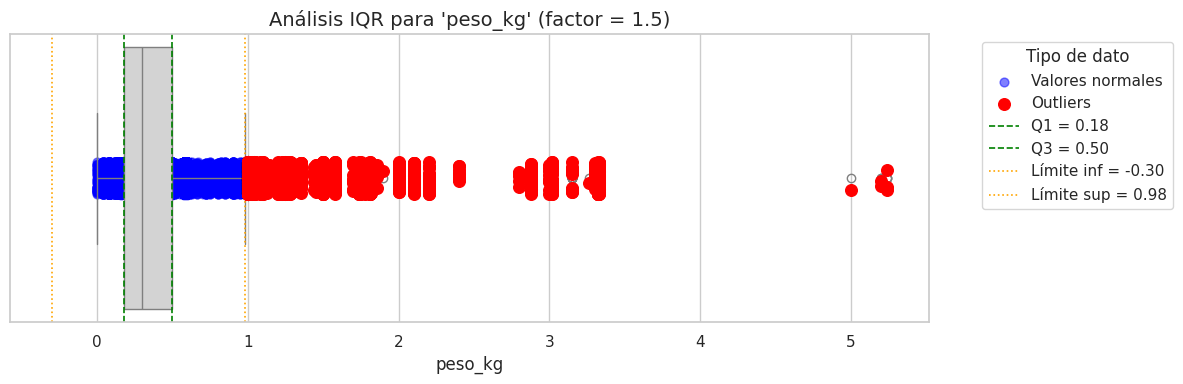


📊 Variable: peso_kg
Q1 = 0.18, Q3 = 0.50, IQR = 0.32
Límite inferior: -0.30, Límite superior: 0.98
Número de outliers detectados: 3898
----------------------------------------------------------------------


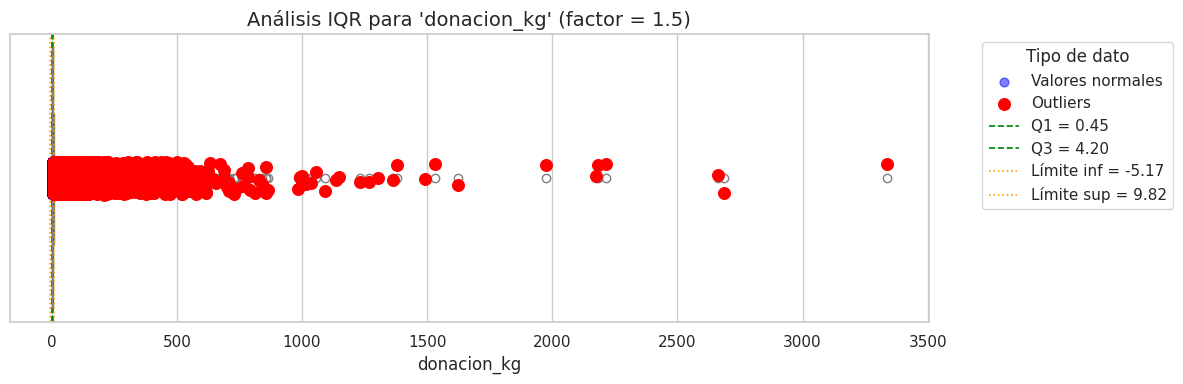


📊 Variable: donacion_kg
Q1 = 0.45, Q3 = 4.20, IQR = 3.75
Límite inferior: -5.17, Límite superior: 9.82
Número de outliers detectados: 7503
----------------------------------------------------------------------


In [ ]:
# --- Aplicar análisis IQR a cada variable ---
for var in variables_continuas:
    datos = df_nuevo[var].dropna().values  # eliminar posibles NaN

    # Cálculo de cuartiles e IQR
    Q1, Q3 = np.percentile(datos, [25, 75])
    IQR = Q3 - Q1

    # Límite inferior y superior con el factor clásico 1.5
    lim_inf = Q1 - 1.5 * IQR
    lim_sup = Q3 + 1.5 * IQR

    # Clasificación de valores
    outliers_iqr = datos[(datos < lim_inf) | (datos > lim_sup)]
    normales_iqr = datos[(datos >= lim_inf) & (datos <= lim_sup)]

    # --- Visualización ---
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=datos, color="lightgray")

    # Puntos azules = normales | rojos = outliers
    plt.scatter(normales_iqr,
                np.random.uniform(-0.05, 0.05, size=len(normales_iqr)),
                color="blue", s=40, alpha=0.5, label="Valores normales")
    plt.scatter(outliers_iqr,
                np.random.uniform(-0.05, 0.05, size=len(outliers_iqr)),
                color="red", s=70, zorder=5, label="Outliers")

    # Líneas de referencia
    plt.axvline(Q1, color="green", linestyle="--", linewidth=1.2, label=f"Q1 = {Q1:.2f}")
    plt.axvline(Q3, color="green", linestyle="--", linewidth=1.2, label=f"Q3 = {Q3:.2f}")
    plt.axvline(lim_inf, color="orange", linestyle=":", linewidth=1.2, label=f"Límite inf = {lim_inf:.2f}")
    plt.axvline(lim_sup, color="orange", linestyle=":", linewidth=1.2, label=f"Límite sup = {lim_sup:.2f}")

    # --- Etiquetas y título ---
    plt.xlabel(var, fontsize=12)
    plt.title(f"Análisis IQR para '{var}' (factor = 1.5)", fontsize=14)
    plt.legend(title="Tipo de dato", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

    # --- Resumen numérico ---
    print(f"\n📊 Variable: {var}")
    print(f"Q1 = {Q1:.2f}, Q3 = {Q3:.2f}, IQR = {IQR:.2f}")
    print(f"Límite inferior: {lim_inf:.2f}, Límite superior: {lim_sup:.2f}")
    print(f"Número de outliers detectados: {len(outliers_iqr)}")
    print("-" * 70)


El análisis IQR revela una alta proporción de valores atípicos en la mayoría de las variables.

Valor presenta 7.528 outliers (≈14.5%), evidenciando una amplia dispersión en los montos, posiblemente por operaciones de alto valor o registros excepcionales.

Cantidad registra 6.871 casos atípicos (≈13.2%), indicando variabilidad significativa en las unidades donadas.

Peso_kg muestra una menor incidencia de outliers (3.898; ≈7.5%), reflejando una distribución más homogénea.

Donacion_kg presenta 7.503 outliers (≈14.4%), lo que sugiere episodios puntuales de donaciones elevadas o inconsistencias en los registros.

En conjunto, los resultados indican que entre el 7% y el 15% de los datos se consideran atípicos, por lo que se recomienda evaluar su impacto antes de aplicar análisis estadísticos sensibles a valores extremos o considerar técnicas de transformación o depuración de datos.

# *ISOLATION FOREST*

🔎 Outliers detectados: 2632 de 52726 observaciones.
Porcentaje de outliers: 4.99%


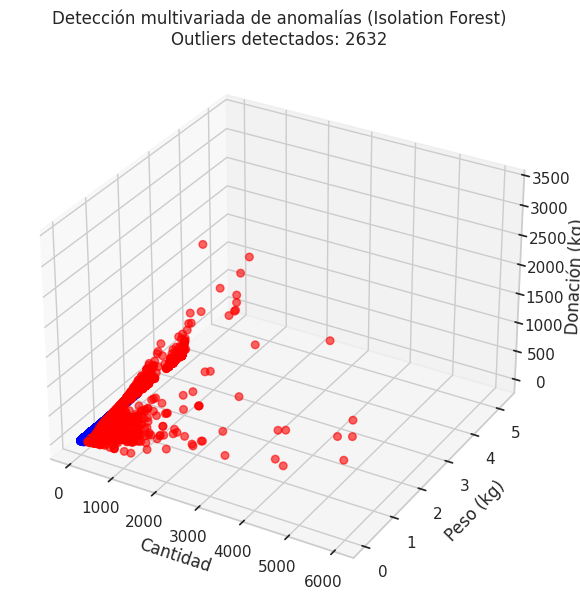

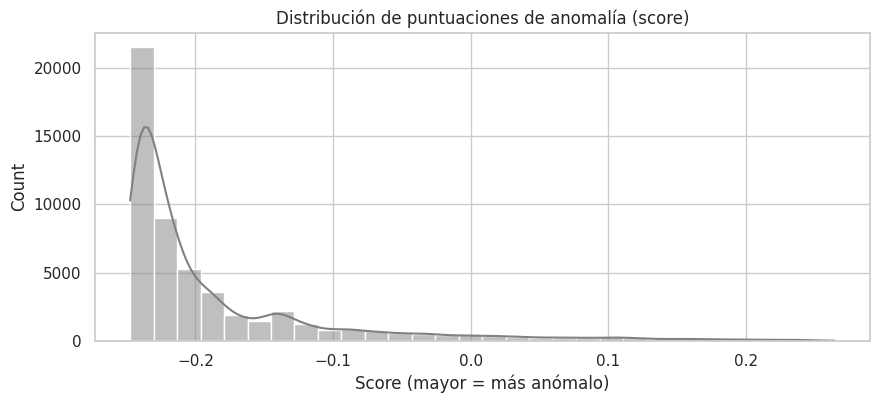


Columnas añadidas al df_nuevo: 'anomaly', 'score'
   anomaly     score
0        1 -0.236547
1        1 -0.234315
2        1 -0.238770
3        1 -0.238923
4        1 -0.190560


In [ ]:
# Detección de outliers multivariada con Isolation Forest


# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (8, 6)
np.random.seed(42)

# Variables a analizar
vars_analisis = ["cantidad", "peso_kg", "donacion_kg"]

# Filtrar y limpiar datos faltantes
df_par = df_nuevo[vars_analisis].dropna()

# Escalado de datos (todas las observaciones)
X_scaled = StandardScaler().fit_transform(df_par)

# Parámetros del Isolation Forest
iso_params = {
    "contamination": 0.05,  # proporción estimada de outliers
    "random_state": 42,
    "n_estimators": 300,
    "n_jobs": -1
}

# Entrenamiento del modelo
iso = IsolationForest(**iso_params)
y_pred = iso.fit_predict(X_scaled)          # 1 = normal, -1 = outlier
scores = -iso.decision_function(X_scaled)   # mayor = más anómalo

# Añadir resultados al dataframe original
df_par["anomaly"] = y_pred
df_par["score"] = scores

# Conteo de anomalías
n_outliers = (df_par["anomaly"] == -1).sum()
print(f"🔎 Outliers detectados: {n_outliers} de {len(df_par)} observaciones.")
print(f"Porcentaje de outliers: {100 * n_outliers / len(df_par):.2f}%")

# ========================
# Visualización 3D
# ========================
fig = plt.figure(figsize=(9, 7))
ax = fig.add_subplot(111, projection='3d')

colores = df_par["anomaly"].map({1: "blue", -1: "red"})

ax.scatter(
    df_par["cantidad"],
    df_par["peso_kg"],
    df_par["donacion_kg"],
    c=colores,
    alpha=0.6,
    s=30
)

ax.set_xlabel("Cantidad")
ax.set_ylabel("Peso (kg)")
ax.set_zlabel("Donación (kg)")
ax.set_title(f"Detección multivariada de anomalías (Isolation Forest)\nOutliers detectados: {n_outliers}")
plt.show()

# ========================
# Visualización 2D de puntuaciones
# ========================
plt.figure(figsize=(10, 4))
sns.histplot(df_par["score"], bins=30, kde=True, color="gray")
plt.title("Distribución de puntuaciones de anomalía (score)")
plt.xlabel("Score (mayor = más anómalo)")
plt.show()

# ========================
# Integrar resultados al df_nuevo completo
# ========================
df_nuevo = df_nuevo.join(df_par[["anomaly", "score"]], how="left")

print("\nColumnas añadidas al df_nuevo: 'anomaly', 'score'")
print(df_nuevo[["anomaly", "score"]].head())


El método Isolation Forest identificó 2.632 valores atípicos de un total de 52.726 observaciones, lo que representa aproximadamente un 4.99% del conjunto de datos. Este porcentaje es notablemente menor al detectado por el método IQR, lo que sugiere que Isolation Forest es más selectivo, enfocándose en patrones verdaderamente anómalos dentro de la estructura multivariable de los datos, teniendo en cuenta el análisis compacto de todas las variables continuas.

En consecuencia, los resultados indican que la mayoría de los registros se ajustan bien al comportamiento general del conjunto, y solo una fracción reducida presenta características inusuales que podrían corresponder a casos excepcionales o errores de registro.

# *DBSCAN*

In [3]:
import pandas as pd

# Ruta del archivo CSV
ruta = "C:/Users/USUARIO/Downloads/df_nuevo.csv"


# Leer el CSV
df = pd.read_csv(ruta)

# Mostrar las primeras filas
print(df.head())

        fecha  material  cantidad motivo   valor  peso_kg  donacion_kg  \
0  2023.03.25   1001069         3    d19  5232.0     0.15         0.45   
1  2023.03.25   1011774         1    d19  3643.0     0.36         0.36   
2  2022.12.26   1035355         2    d19  8762.0     0.20         0.40   
3  2022.12.26   1035355         1    d19  4381.0     0.20         0.20   
4  2023.03.25   1000145         1    d19  2854.0     0.08         0.08   

     planta centro of_ventas             categoria         subcategoria  \
0  medellín   nn47        10  alimentos larga vida  larga vida cárnicos   
1  medellín   nn47        10  alimentos larga vida  larga vida cárnicos   
2  medellín   nnb1       NaN          carnes frías              tajados   
3  medellín   nnb1       NaN          carnes frías              tajados   
4  medellín   nn47        10  alimentos larga vida  larga vida cárnicos   

                       linea    marca       demanda       causales  
0      salchichas larga vida     ri

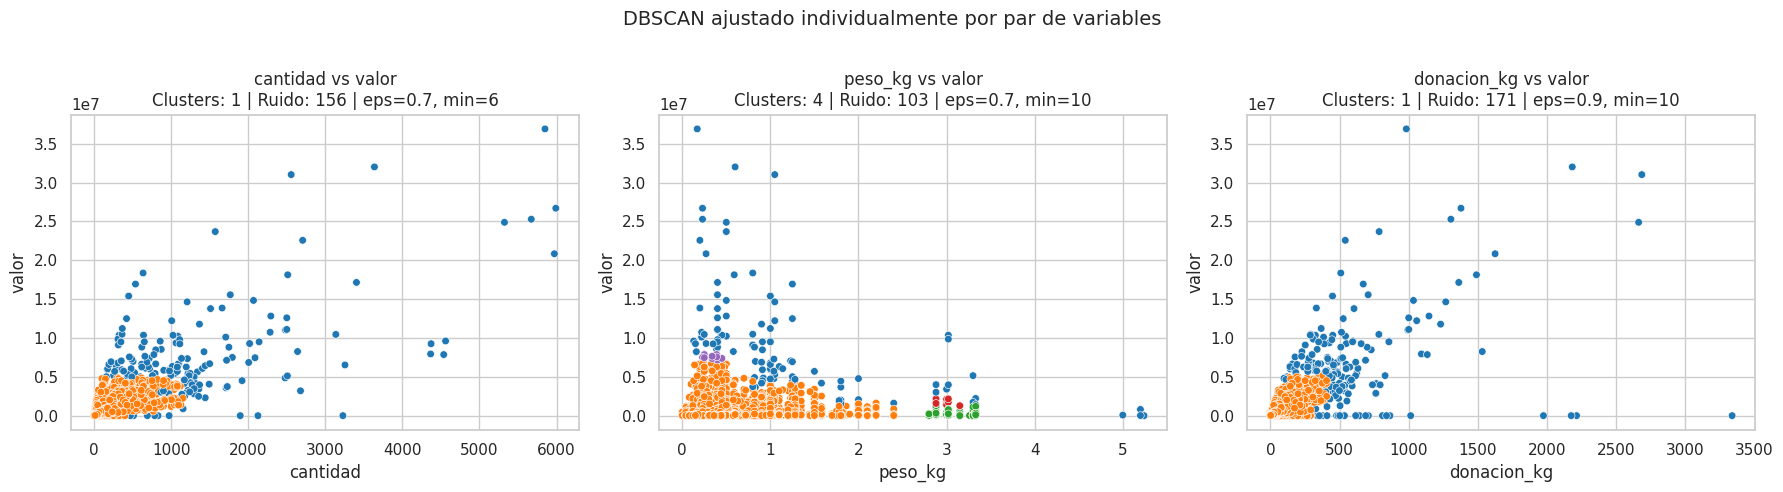

In [4]:
# ===========================================
# DBSCAN con ajuste de parámetros por par (Y = 'valor')
# ===========================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# --- Configuración visual ---
sns.set_theme(style="whitegrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (15, 4)
np.random.seed(42)

# --- Lista de pares X-Y ---
pares = [
    ("cantidad", "valor"),
    ("peso_kg", "valor"),
    ("donacion_kg", "valor")
]

# --- Parámetros específicos por par ---
parametros = {
    "cantidad": {"eps": 0.7, "min_samples": 6},
    "peso_kg": {"eps": 0.7, "min_samples": 10},
    "donacion_kg": {"eps": 0.9, "min_samples": 10}
}

# --- Graficar DBSCAN para cada par ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (x_col, y_col) in enumerate(pares):
    # Datos y escalado
    X = df[[x_col, y_col]].dropna().values
    X_scaled = StandardScaler().fit_transform(X)
    
    # Obtener parámetros específicos
    eps = parametros[x_col]["eps"]
    min_samples = parametros[x_col]["min_samples"]
    
    # Aplicar DBSCAN
    db = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
    labels = db.fit_predict(X_scaled)
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)

    # Graficar
    ax = axes[i]
    sns.scatterplot(
        x=df[x_col],
        y=df[y_col],
        hue=labels,
        palette='tab10',
        ax=ax,
        s=30,
        legend=False
    )
    ax.set_title(
        f"{x_col} vs {y_col}\n"
        f"Clusters: {n_clusters} | Ruido: {n_noise} | eps={eps}, min={min_samples}"
    )
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.suptitle("DBSCAN ajustado individualmente por par de variables", fontsize=14)
plt.tight_layout()
plt.show()

Los resultados que refleja el DB-SCAN, en la primera gráfica es evidente la diferencia entre los dos grupos para algunos valores, hay unos que se solapan; y su comportamiento es muy similar al de la tercera gráfica. Para la seunda gráfica del peso_kg vs valor, se logran identificar 5 grupos, siendo los grupos rojo, verde y morado muy cercanos y quizá confundiendo los subgrupos con su solapamiento. De acuerdo a estos resultados, se podría decir que estos datos se pueden analizar con subgrupos, por medio de modelos independientes que lleven a definir e identificar su comportamiento.

# **8. Conclusiones**

*   La selección de las variables elegidas para hacer el análisis de datos, siguió un proceso de dos etapas, incluyendo revisión de literatura y consulta con expertos en la cadena de abastecimiento de alimentos, en la etapa de donación, permitiendo enfocar el estudio en las variables que realmente representan interés. Siendo la variable respuesta "valor", que depende de tres variables continuas: "cantidad", "peso_kg" y "donacion_kg" y 12 categóricas: "material", "motivo", "FechaFact#", "planta", "centro", "Ofc#Ventas", "Categoria", "Subcategoría", "Linea", "Marca", "Ord/Ext"	y "Causales NUEVOS"
*   En la limpieza de datos se logró obtener un df_nuevo con las características escenciales para poder hacer el análisis de datos buscando obtener un df completamente manipulable gracias a sus estándares de configuración.

*   La presencia de datos "0" y "N/A" es necesario estudiarlos, ya sea por medio de técnicas de imputación u otra herramienta, ya que su presencia es interesante para el estudio.
  
*   La presencia de una alta varibilidad de toda las variables estudiadas, fue el común denominador durante todo el proceso, explicado posiblemente por el contexto del análisis. En dónde las donaciones pueden ser de un valor muy pequeño normalmente, y pocas veces los valores son demasiado altos. Pero que se hace necesario estudarlos, porque son eventos que suceden ocacionalmente, puede ser por medio de varios modelos que puedan interpretar y ayudar a entender los diferentes comportamientos de estos diferentes rangos de valores.

*   El estudio ayudó a conocer la data, a interpretar el valor que tiene cada registro dentro de la base de datos. Entender la importancia del contexto y cómo se obtienen los datos para poder hacer conexiones de comportamientos que reflejan las herramientas. Este primer paso contribuye a afianzar el conocimiento adquirido en clase, a interpretar más allá de los resultados y valorar la importancia del análisis exploratorio en la ciencia de datos.








# **Referencias**

Akkaş, A., & Gaur, V. (2022). OM Forum—Reducing Food Waste: An Operations Management Research Agenda. Manufacturing & Service Operations Management, 24(3), 1261-1275. https://doi.org/10.1287/msom.2021.1044